# **Problem 1: Import the data and |split the data and train Logistic regression and KNN models**

In [1]:
#import important libraries
import numpy as np #to deal with arrays
import pandas as pd #to deal with dataframes
import matplotlib.pyplot as plt #pyplot is a collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns #for visualization
from sklearn.datasets import load_wine #load the dataset
from sklearn.model_selection import train_test_split #for test and train split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix #to use the function of classification report and confuion matrix
%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv('/content/Assignment3_dataset.csv')
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.411765  0.623116       0.573770       0.333333  0.254137  0.380030   
1     0.294118  0.542714       0.590164       0.434343  0.088652  0.538003   
2     0.058824  0.437186       0.491803       0.373737  0.088652  0.554396   
3     0.058824  0.723618       0.672131       0.464646  0.212766  0.687034   
4     0.058824  0.557789       0.508197       0.131313  0.215130  0.357675   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.035440  0.266667        0  
1                  0.078992  0.200000        0  
2                  0.184031  0.016667        0  
3                  0.109735  0.416667        1  
4                  0.025619  0.033333        0

In [3]:
#get some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
#describe the dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.607510       0.566438       0.207439    0.094326   
std       0.198210    0.160666       0.158654       0.161134    0.136222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.497487       0.508197       0.000000    0.000000   
50%       0.176471    0.587940       0.590164       0.232323    0.036052   
75%       0.352941    0.704774       0.655738       0.323232    0.150414   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.476790                  0.168179    0.204015    0.348958  
std      0.117499                  0.141473    0.196004    0.476951  
min      0.000000                  0.000000    0.000000    0.000000  
25%      0.406855                  0.070773    0.050000    0.000000  
50%      0.476900                  0.125747    0.133333    0.000000  
75%      0.545455                  0.234095    0.333333    1.000000  
max      1.000000                  1.000000    1.000000    1.000000

In [5]:
#split the data into train and test split
X = df.drop('Outcome',axis=1)
y = df['Outcome'] 

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(X,y,test_size = 0.25 ,random_state=0, shuffle=False)

In [7]:
x_train

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.411765  0.623116       0.573770       0.333333  0.254137  0.380030   
1       0.294118  0.542714       0.590164       0.434343  0.088652  0.538003   
2       0.058824  0.437186       0.491803       0.373737  0.088652  0.554396   
3       0.058824  0.723618       0.672131       0.464646  0.212766  0.687034   
4       0.058824  0.557789       0.508197       0.131313  0.215130  0.357675   
..           ...       ...            ...            ...       ...       ...   
571     0.117647  0.874372       0.721311       0.373737  0.141844  0.663189   
572     0.352941  0.628141       0.622951       0.000000  0.000000  0.503726   
573     0.529412  0.763819       0.639344       0.343434  0.202128  0.509687   
574     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   
575     0.117647  0.527638       0.475410       0.404040  0.111111  0.520119   

     DiabetesPedigreeFunction       Age  
0                    0.035440  0.266667  
1                    0.078992  0.200000  
2                    0.184031  0.016667  
3                    0.109735  0.416667  
4                    0.025619  0.033333  
..                        ...       ...  
571                  0.242528  0.050000  
572                  0.018360  0.550000  
573                  0.347993  0.200000  
574                  0.101196  0.033333  
575                  0.062767  0.066667  

[576 rows x 8 columns]

In [8]:
print(len(x_train))

576


In [9]:
print(len(y_test))

192


## **Apply Logistic regression model**

Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [11]:
#print accuracy and classification report of LR 
from sklearn.metrics import classification_report ,accuracy_score
lr_accuracy =accuracy_score(y_test,y_pred_lr)
print(lr_accuracy)
print(classification_report(y_train,lr.predict(x_train)))
print(classification_report(y_test,y_pred_lr))

0.7708333333333334
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       373
           1       0.76      0.53      0.62       203

    accuracy                           0.78       576
   macro avg       0.77      0.72      0.73       576
weighted avg       0.77      0.78      0.76       576

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       127
           1       0.76      0.48      0.58        65

    accuracy                           0.77       192
   macro avg       0.77      0.70      0.71       192
weighted avg       0.77      0.77      0.75       192



In [12]:
#confusion matrix for logistic regression model
cm = metrics.confusion_matrix(y_test, y_pred_lr)
print(cm)

[[117  10]
 [ 34  31]]


In [13]:
score = lr.score(x_test, y_test)
print(score)

0.7708333333333334


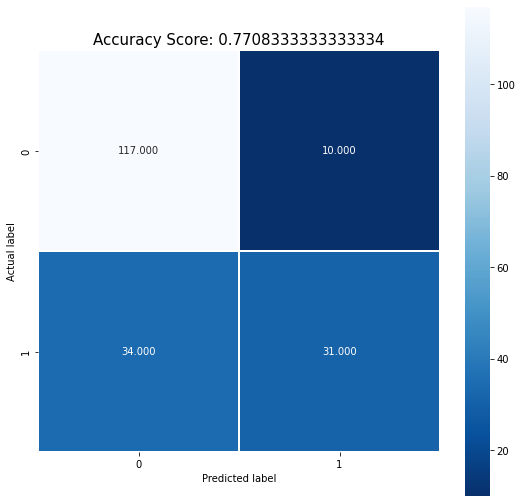

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## **Apply KNN model**

K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [16]:
#print accuracy and classification report of  KNN
knn_accracy=accuracy_score(y_test,y_pred_knn)
print(knn_accracy)
print(classification_report(y_train,knn.predict(x_train)))
print(classification_report(y_test,y_pred_knn))

0.75
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       373
           1       0.80      0.68      0.74       203

    accuracy                           0.83       576
   macro avg       0.82      0.79      0.80       576
weighted avg       0.83      0.83      0.82       576

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       127
           1       0.65      0.57      0.61        65

    accuracy                           0.75       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.75      0.75       192



In [17]:
cm = confusion_matrix(y_test, y_pred_knn)
ac = accuracy_score(y_test,y_pred_knn)

In [18]:
#print the accuracy score for knn model
score_knn = knn.score(x_test, y_test)
print(score_knn)

0.75


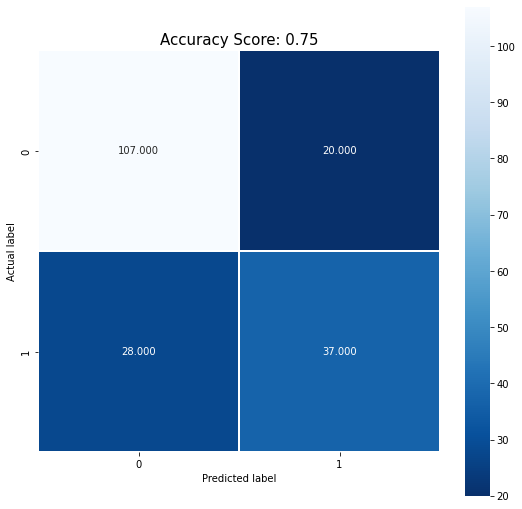

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_knn)
plt.title(all_sample_title, size = 15);

## **Apply TSNE for plotting on training and testing**

T-distributed Stochastic Neighbor Embedding: is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

In [20]:
from sklearn.manifold import TSNE

### **Apply TSNE on training set**

In [21]:
tsne = TSNE(n_components=2,random_state=0)
z = tsne.fit_transform(x_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [22]:
df1 = pd.DataFrame()
df1["y_knn"] = knn.predict(x_train)
df1["y_lr"] = lr.predict(x_train)
df1["y_actual"] = y_train
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]

[Text(0.5, 1.0, 'TSNE on training with actual labels')]

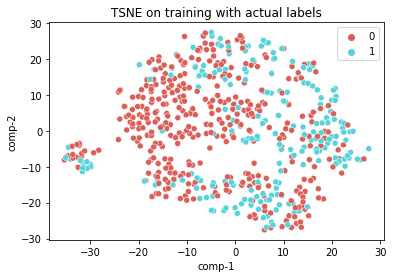

In [23]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title="TSNE on training with actual labels") 

[Text(0.5, 1.0, 'TSNE on training with predicted Logistic regression labels')]

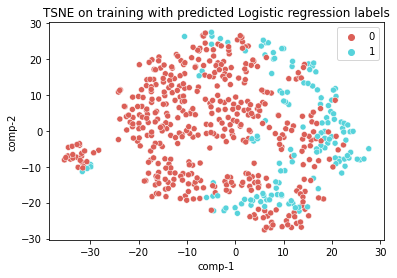

In [24]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title="TSNE on training with predicted Logistic regression labels")

[Text(0.5, 1.0, 'TSNE on training with predicted knn label')]

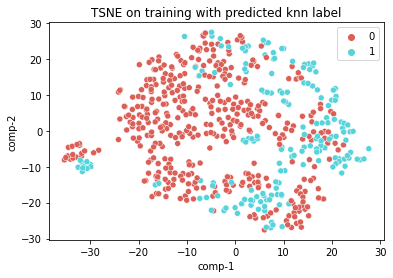

In [25]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title="TSNE on training with predicted knn label")

### **Apply TSNE on testing set**

In [26]:
tsne2 = TSNE(n_components=2,random_state=0)
z2 = tsne2.fit_transform(x_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [27]:
df2 = pd.DataFrame()
df2["y_knn"] =y_pred_knn
df2["y_lr"] = y_pred_lr
df2["y_actual"] = y_test
df2["comp-1"] = z2[:,0]
df2["comp-2"] = z2[:,1]

[Text(0.5, 1.0, 'TSNE on testing with actual labels')]

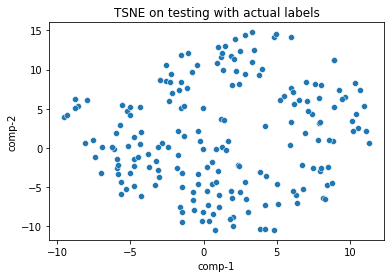

In [28]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df2).set(title="TSNE on testing with actual labels") 

[Text(0.5, 1.0, 'TSNE on testing with predicted Logistic regression labels')]

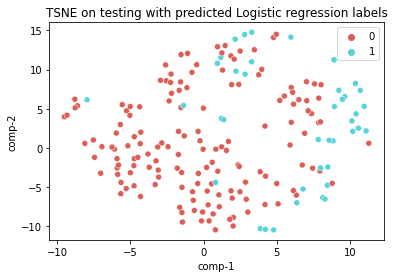

In [29]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df2).set(title="TSNE on testing with predicted Logistic regression labels")

[Text(0.5, 1.0, 'TSNE on testing with predicted knn labels')]

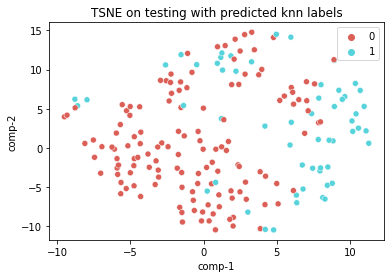

In [30]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df2).set(title="TSNE on testing with predicted knn labels")

# **Question 2: Choose the best number of cluster for k-means clustering algorithm**

[Text(0.5, 1.0, 'K value Vs WCSS')]

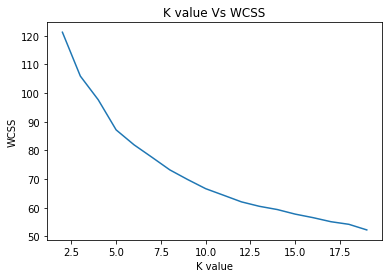

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
scores =[]
for i in range(2,20):
  kmean = KMeans(n_clusters=i)
  kmean.fit(X)
  wcss.append(kmean.inertia_)
  y_pred= kmean.predict(X)
  scores.append(silhouette_score(X,y_pred))
plt.xlabel('K value')
plt.ylabel('WCSS')
sns.lineplot(x=range(2,20),y=wcss,).set(title="K value Vs WCSS")


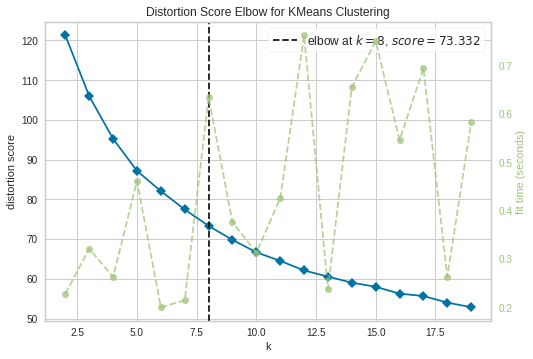

In [32]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmean, k=(2,20))
visualizer.fit(X)       
visualizer.show()        

[Text(0.5, 1.0, 'K value Vs silhouette_score')]

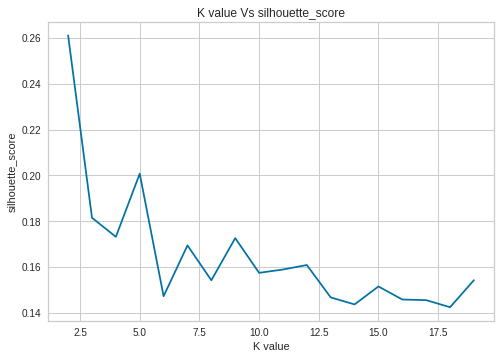

In [33]:
plt.xlabel('K value')
plt.ylabel('silhouette_score')
sns.lineplot(x=range(2,20),y=scores,).set(title="K value Vs silhouette_score")

**As we can see, the optimal number of k based on the silhouette score is k = 2**

In [34]:
kmean = KMeans(n_clusters=2)
y_cluster = kmean.fit_predict(X)

In [35]:
tsne3 = TSNE(n_components=2,random_state=0)
z3 = tsne3.fit_transform(X) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [36]:
df3 = pd.DataFrame()
df3["y_Kmean"] = y_cluster
df3["comp-1"] = z3[:,0]
df3["comp-2"] = z3[:,1] 

[Text(0.5, 1.0, 'TSNE on Kmean with Cluster labels')]

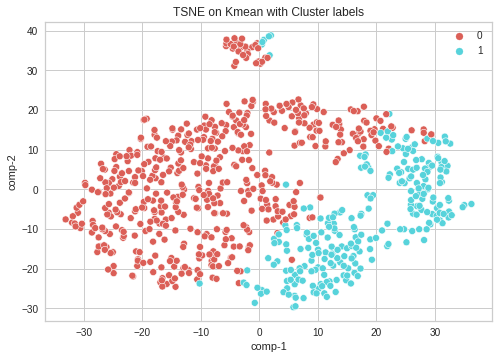

In [37]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df3.y_Kmean.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df3).set(title="TSNE on Kmean with Cluster labels")

# **Question 3: Apply PCA**

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [38]:
#apply pca on the data
from sklearn.decomposition import PCA
scores_lr = []
scores_knn = []
for i in range(2,8):
  pca= PCA(n_components=i)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)
  lr = LogisticRegression()
  lr.fit(x_train_pca,y_train)
  y_pred_lr = lr.predict(x_test_pca)
  scores_lr.append(accuracy_score(y_pred_lr,y_test))
  knn = KNeighborsClassifier()
  knn.fit(x_train_pca,y_train)
  y_pred_knn = knn.predict(x_test_pca)
  scores_knn.append(accuracy_score(y_pred_knn,y_test))


In [39]:
#scores of logistic regression model with PCA
scores_lr

[0.7083333333333334,
 0.7604166666666666,
 0.7604166666666666,
 0.7604166666666666,
 0.7552083333333334,
 0.7864583333333334]

In [40]:
#scores of knn model with PCA
scores_knn

[0.6510416666666666,
 0.7291666666666666,
 0.7604166666666666,
 0.7083333333333334,
 0.7083333333333334,
 0.7604166666666666]

In [41]:
# n =7 is the best number number of coponebt that achieve high accuarcy on lr and knn
for i,j,k in zip(range(2,8),scores_lr,scores_knn):
  print((i,j,k))

(2, 0.7083333333333334, 0.6510416666666666)
(3, 0.7604166666666666, 0.7291666666666666)
(4, 0.7604166666666666, 0.7604166666666666)
(5, 0.7604166666666666, 0.7083333333333334)
(6, 0.7552083333333334, 0.7083333333333334)
(7, 0.7864583333333334, 0.7604166666666666)


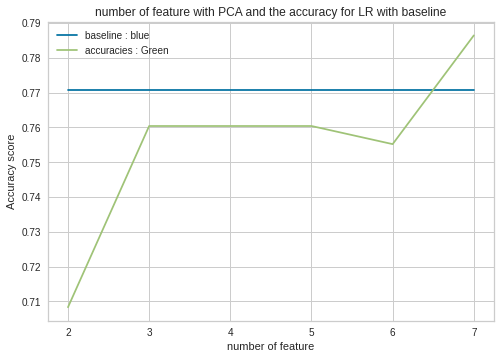

In [42]:
plt.title('number of feature with PCA and the accuracy for LR with baseline')
plt.xlabel('number of feature')
plt.ylabel('Accuracy score')
plt.plot(range(2,8),[lr_accuracy,lr_accuracy,lr_accuracy,lr_accuracy,lr_accuracy,lr_accuracy])
plt.plot(range(2,8),scores_lr)
plt.legend(labels=['baseline : blue','accuracies : Green'])

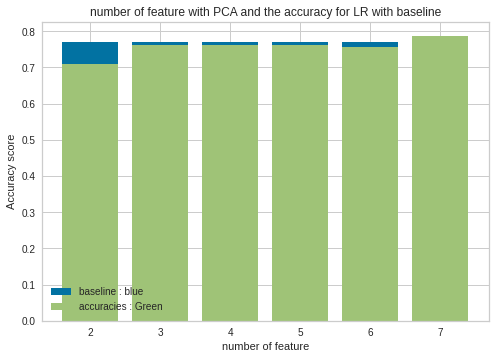

In [43]:
plt.title('number of feature with PCA and the accuracy for LR with baseline')
plt.xlabel('number of feature')
plt.ylabel('Accuracy score')
plt.bar(range(2,8),[lr_accuracy,lr_accuracy,lr_accuracy,lr_accuracy,lr_accuracy,lr_accuracy])
plt.bar(range(2,8),scores_lr)
plt.legend(labels=['baseline : blue','accuracies : Green'],loc='lower left')

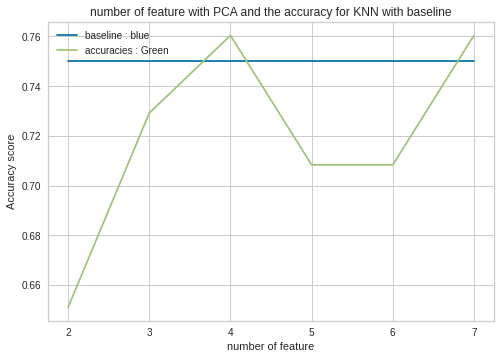

In [44]:
plt.title('number of feature with PCA and the accuracy for KNN with baseline')
plt.xlabel('number of feature')
plt.ylabel('Accuracy score')
plt.plot(range(2,8),[knn_accracy,knn_accracy,knn_accracy,knn_accracy,knn_accracy,knn_accracy])
plt.plot(range(2,8),scores_knn)
plt.legend(labels=['baseline : blue','accuracies : Green'])

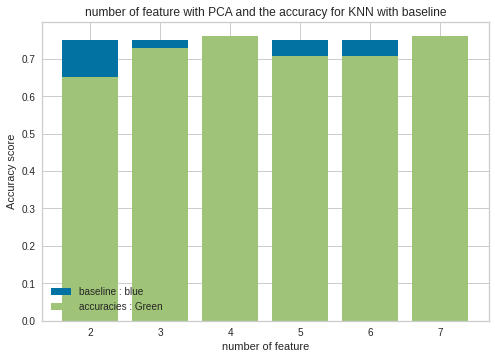

In [45]:
plt.title('number of feature with PCA and the accuracy for KNN with baseline')
plt.xlabel('number of feature')
plt.ylabel('Accuracy score')
plt.bar(range(2,8),[knn_accracy,knn_accracy,knn_accracy,knn_accracy,knn_accracy,knn_accracy])
plt.bar(range(2,8),scores_knn)
plt.legend(labels=['baseline : blue','accuracies : Green'],loc='lower left')

## **Apply PCA on the best number of n**

In [46]:
pca= PCA(n_components=7)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
lr = LogisticRegression()
lr.fit(x_train_pca,y_train)
y_pred_lr = lr.predict(x_test_pca)

knn = KNeighborsClassifier()
knn.fit(x_train_pca,y_train)
y_pred_knn = knn.predict(x_test_pca)


In [47]:
print('accuracy for lr with PCA : ',accuracy_score(y_test,y_pred_lr))
print('accuracy for knn with PCA : ',accuracy_score(y_test,y_pred_knn))

accuracy for lr with PCA :  0.7864583333333334
accuracy for knn with PCA :  0.7604166666666666


## **Apply TSNE on training data**

In [48]:
tsne4 = TSNE(n_components=2,random_state=0)
z4 = tsne4.fit_transform(x_train_pca) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [49]:
df4 = pd.DataFrame()
df4["y_lr"] = lr.predict(x_train_pca)
df4["y_knn"] =knn.predict(x_train_pca)
df4["y_actual"] = y_train
df4["comp-1"] = z4[:,0]
df4["comp-2"] = z4[:,1]

[Text(0.5, 1.0, 'TSNE on training data with pca actual labels')]

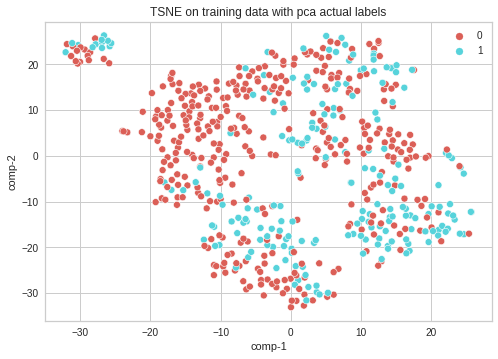

In [50]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df4.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df4).set(title="TSNE on training data with pca actual labels") 

[Text(0.5, 1.0, 'TSNE on training data with pca knn predicted labels')]

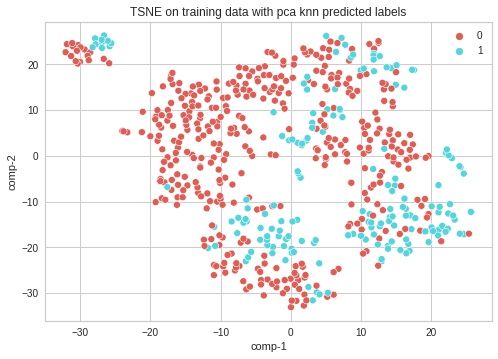

In [51]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df4.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df4).set(title="TSNE on training data with pca knn predicted labels") 

[Text(0.5, 1.0, 'TSNE on training data with pca lr predicted labels')]

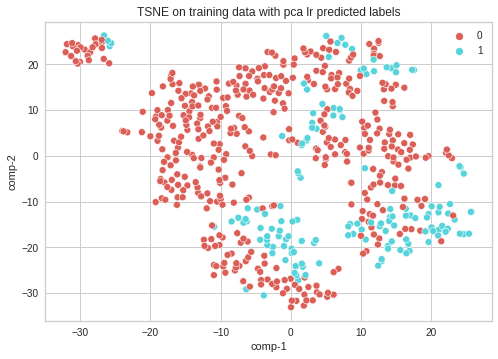

In [52]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df4.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df4).set(title="TSNE on training data with pca lr predicted labels") 

## **Apply TSNE on testing data**

In [53]:
tsne5 = TSNE(n_components=2,random_state=0)
z5 = tsne5.fit_transform(x_test_pca) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'TSNE on test data with pca actual labels')]

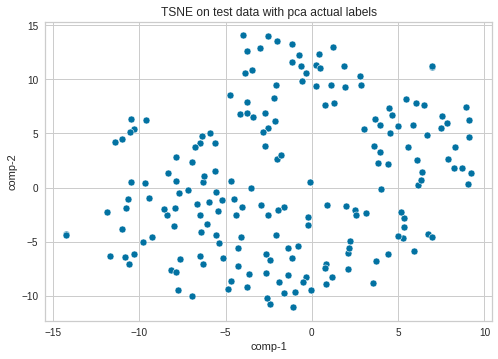

In [54]:
df5 = pd.DataFrame()
df5["y_lr"] = y_pred_lr
df5["y_knn"] =y_pred_knn
df5["y_actual"] = y_test
df5["comp-1"] = z5[:,0]
df5["comp-2"] = z5[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df5.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df5).set(title="TSNE on test data with pca actual labels") 

[Text(0.5, 1.0, 'TSNE on test data with pca lr predicted label')]

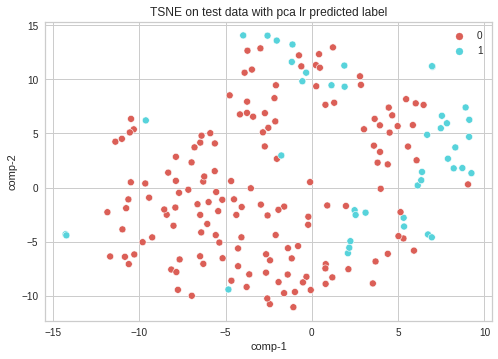

In [55]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df5.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df5).set(title="TSNE on test data with pca lr predicted label") 

[Text(0.5, 1.0, 'TSNE on test data with pca knn predicted label')]

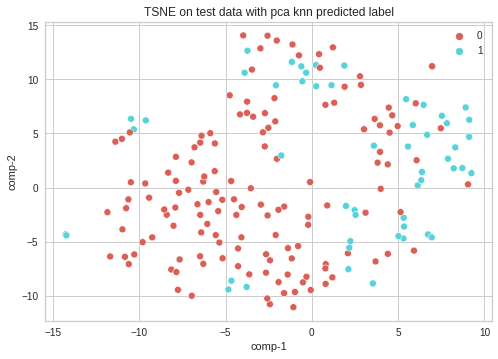

In [56]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df5.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df5).set(title="TSNE on test data with pca knn predicted label") 

# **Question 4: Apply Feature Selection methods**

## **Apply filter methods** : Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

### **Information gain method**

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [57]:
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.411765  0.623116       0.573770       0.333333  0.254137  0.380030   
1       0.294118  0.542714       0.590164       0.434343  0.088652  0.538003   
2       0.058824  0.437186       0.491803       0.373737  0.088652  0.554396   
3       0.058824  0.723618       0.672131       0.464646  0.212766  0.687034   
4       0.058824  0.557789       0.508197       0.131313  0.215130  0.357675   
..           ...       ...            ...            ...       ...       ...   
763     0.000000  0.587940       0.655738       0.313131  0.062648  0.673621   
764     0.705882  0.422111       0.590164       0.313131  0.000000  0.442623   
765     0.352941  0.618090       0.590164       0.454545  0.271868  0.500745   
766     0.058824  0.984925       0.622951       0.363636  0.294326  0.543964   
767     0.176471  0.648241       0.524590       0.292929  0.135934  0.393443   

     DiabetesPedigreeFunction       Age  
0                    0.035440  0.266667  
1                    0.078992  0.200000  
2                    0.184031  0.016667  
3                    0.109735  0.416667  
4                    0.025619  0.033333  
..                        ...       ...  
763                  0.004697  0.050000  
764                  0.093510  0.416667  
765                  0.279675  0.216667  
766                  0.340307  0.133333  
767                  0.060205  0.116667  

[768 rows x 8 columns]

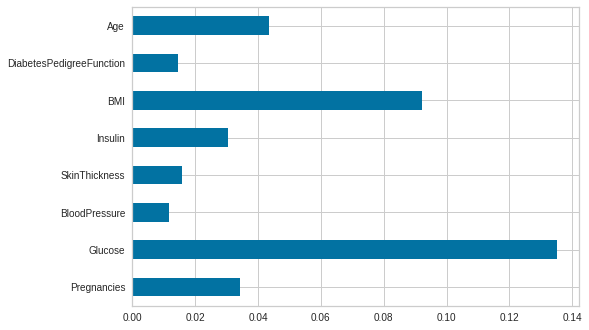

In [58]:
# information Gain
from traitlets.traitlets import ForwardDeclaredInstance
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance,df.columns[0:len(df.columns)-1])
feat_importance.plot(kind='barh')

In [59]:
# based on information gain we will select the highest four feature that has information gain
x_train_ig = x_train[['Age','BMI','Glucose','Pregnancies']]
x_test_ig = x_test[['Age','BMI','Glucose','Pregnancies']]

In [60]:
#Apply LR on the information gain
lr_ig = LogisticRegression()
lr_ig.fit(x_train_ig,y_train)
y_pred_ig_lr = lr_ig.predict(x_test_ig)

In [61]:
lr_ig_accracy=accuracy_score(y_test,y_pred_ig_lr)
print(lr_ig_accracy)
print(classification_report(y_train,lr_ig.predict(x_train_ig)))
print(classification_report(y_test,y_pred_ig_lr))

0.7864583333333334
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       373
           1       0.73      0.50      0.59       203

    accuracy                           0.76       576
   macro avg       0.75      0.70      0.71       576
weighted avg       0.75      0.76      0.75       576

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       127
           1       0.75      0.55      0.64        65

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192



In [62]:
#feature selection method to compare between the features
def featureSelection(x_train, y_train, x_test, y_test, FSM, model):
  fs = FSM
  fs.fit(x_train, y_train.values.ravel())
  X_train_new = fs.transform(x_train)
  X_test_new = fs.transform(x_test) 
  model.fit(X_train_new, y_train.values.ravel())
  y_pred = model.predict(X_test_new)
  accuracyScore = accuracy_score(y_test, y_pred) * 100
  
  return accuracyScore

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
def FilterMethod(x_train1, y_train1, x_test1, y_test1,  model_name):
  accuracy_dic={}
  accuracy_list=[]
  accuracy_list2=[]
  model = model_name
  for i in range(2,9):
    fsm =  SelectKBest(mutual_info_classif, k=i)
    accuracyScore = featureSelection(x_train1, y_train1, x_test1, y_test1, fsm, model)
    accuracy_list.append(accuracyScore)
    fsm2 =  SelectKBest(f_classif, k=i) 
    acc2 = featureSelection(x_train1, y_train1, x_test1, y_test1, fsm2, model)
    accuracy_list2.append(acc2)
  print(accuracy_list)
  print('max mutal',max(accuracy_list))
  print(accuracy_list2)
  print('max anova',max(accuracy_list2))
  if(max(accuracy_list)>max(accuracy_list2)):
    best_n=accuracy_list.index(max(accuracy_list))+2
    print("Best value of n components: ",best_n, "from Mutual information for a discrete target filter method")
    accuracy_dic={"n-component":[2,3,4,5,6,7,8],"accuracy":accuracy_list}
    accuracy_df=pd.DataFrame(accuracy_dic)
    ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,
                palette=["b" if x!=8 else 'g' for x in accuracy_df['n-component']]).set(title=' Mutual information for a discrete target filter method')
  else:
    best_n=  accuracy_list2.index(max(accuracy_list2))+2
    print("Best value of n components : ",best_n, 'from ANOVA')
    #accuracy_list.append(accuracy_score(y_test, y_pred_LR))
    accuracy_dic={"n-component":[2,3,4,5,6,7,8],"accuracy":accuracy_list2}
    accuracy_df=pd.DataFrame(accuracy_dic)
    ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,
                palette=["b" if x!=8 else 'g' for x in accuracy_df['n-component']]).set(title='ANOVA filter method')

[77.08333333333334, 76.5625, 76.5625, 77.60416666666666, 77.60416666666666, 78.125, 77.08333333333334]
max mutal 78.125
[77.08333333333334, 78.125, 78.64583333333334, 77.60416666666666, 77.60416666666666, 78.125, 77.08333333333334]
max anova 78.64583333333334
Best value of n components :  4 from ANOVA


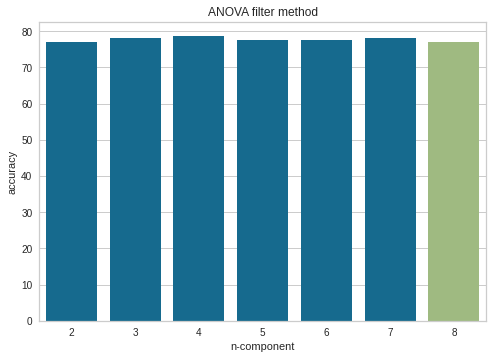

In [64]:
FilterMethod(x_train, y_train, x_test, y_test, LogisticRegression())

In [65]:
#Apply KNN with information gain
knn_ig = KNeighborsClassifier()
knn_ig.fit(x_train_ig,y_train)
y_pred_ig_knn = knn_ig.predict(x_test_ig)

In [66]:
knn_ig_accracy=accuracy_score(y_test,y_pred_ig_knn)
print(knn_ig_accracy)
print(classification_report(y_train,knn_ig.predict(x_train_ig)))
print(classification_report(y_test,y_pred_ig_knn))

0.765625
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       373
           1       0.72      0.71      0.72       203

    accuracy                           0.80       576
   macro avg       0.79      0.78      0.78       576
weighted avg       0.80      0.80      0.80       576

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       127
           1       0.68      0.58      0.63        65

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



[76.04166666666666, 77.08333333333334, 78.125, 75.0, 75.52083333333334, 76.04166666666666, 75.0]
max mutal 78.125
[76.04166666666666, 77.08333333333334, 76.5625, 75.0, 74.47916666666666, 73.4375, 75.0]
max anova 77.08333333333334
Best value of n components:  4 from Mutual information for a discrete target filter method


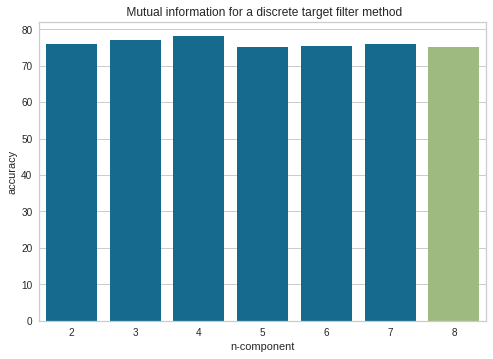

In [67]:
FilterMethod(x_train, y_train, x_test, y_test, KNeighborsClassifier())

#### **Apply TSNE on training data with information gain**

In [68]:
tsne6 = TSNE(n_components=2,random_state=0)
z6 = tsne6.fit_transform(x_train_ig) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [69]:
df6 = pd.DataFrame()
df6["y_lr"] = lr_ig.predict(x_train_ig)
df6["y_knn"] =knn_ig.predict(x_train_ig)
df6["y_actual"] = y_train
df6["comp-1"] = z6[:,0]
df6["comp-2"] = z6[:,1]


[Text(0.5, 1.0, 'TSNE on train with information gain filter data actual labels')]

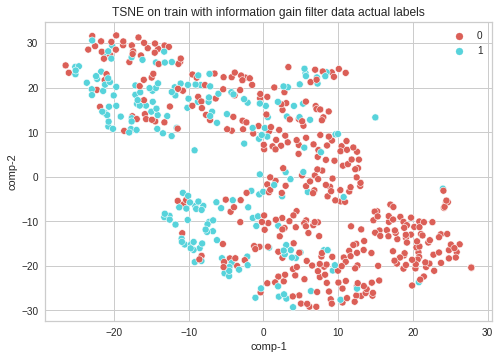

In [70]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df6.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df6).set(title="TSNE on train with information gain filter data actual labels") 

[Text(0.5, 1.0, 'TSNE on train with information gain filter data lr predicted labels')]

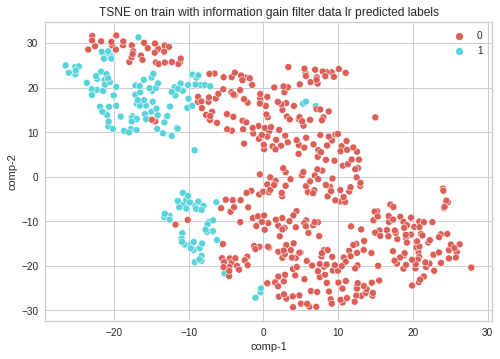

In [71]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df6.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df6).set(title="TSNE on train with information gain filter data lr predicted labels") 

[Text(0.5, 1.0, 'TSNE on train with information gain filter data knn predicted labels')]

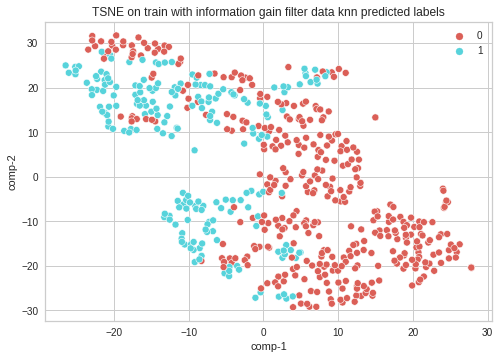

In [72]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df6.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df6).set(title="TSNE on train with information gain filter data knn predicted labels") 

#### **Apply TSNE on testing data with information gain**

In [73]:
tsne7 = TSNE(n_components=2,random_state=0)
z7 = tsne7.fit_transform(x_test_ig) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [74]:
df7 = pd.DataFrame()
df7["y_lr"] = y_pred_ig_lr
df7["y_knn"] = y_pred_ig_knn
df7["y_actual"] = y_test
df7["comp-1"] = z7[:,0]
df7["comp-2"] = z7[:,1]


[Text(0.5, 1.0, 'TSNE on test with information gain filter data actual labels')]

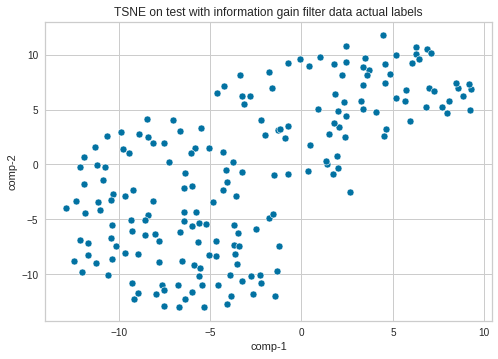

In [75]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df7.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df7).set(title="TSNE on test with information gain filter data actual labels") 

[Text(0.5, 1.0, 'TSNE on test with information gain filter data predicted lr labels')]

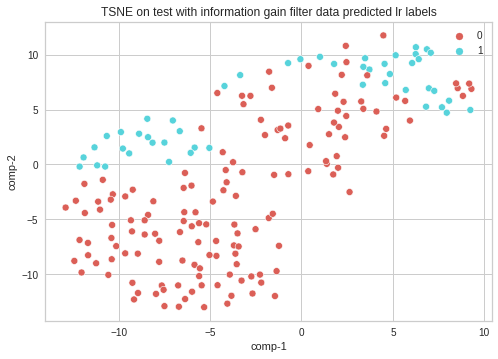

In [76]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df7.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df7).set(title="TSNE on test with information gain filter data predicted lr labels") 

[Text(0.5, 1.0, 'TSNE on test with information gain filter data predicted knn labels')]

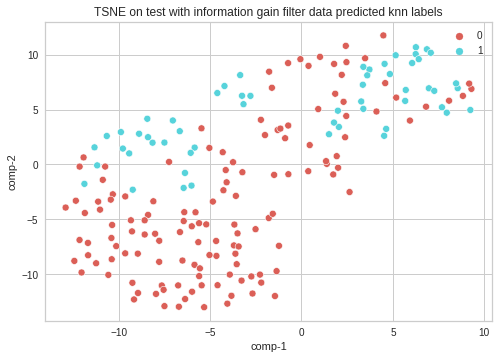

In [77]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df7.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df7).set(title="TSNE on test with information gain filter data predicted knn labels") 

## **Apply Variance threshold**

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

In [78]:
# Variance threshold 
from sklearn.feature_selection import VarianceThreshold
v = VarianceThreshold(threshold=0.02)
v.fit(X)
v.get_support()

array([ True,  True,  True,  True, False, False, False,  True])

In [79]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [80]:
#select the train and test features for variance threshold
x_train_v = x_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Age']]
x_test_v = x_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Age']]

In [81]:
#apply LR model with variance threshold
lr_v = LogisticRegression()
lr_v.fit(x_train_v,y_train)
y_pred_v_lr = lr_v.predict(x_test_v)

In [82]:
lr_v_accracy=accuracy_score(y_test,y_pred_v_lr)
print(lr_v_accracy)
print(classification_report(y_train,lr_v.predict(x_train_v)))
print(classification_report(y_test,y_pred_v_lr))

0.7708333333333334
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       373
           1       0.71      0.46      0.56       203

    accuracy                           0.74       576
   macro avg       0.73      0.68      0.69       576
weighted avg       0.74      0.74      0.73       576

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       127
           1       0.76      0.48      0.58        65

    accuracy                           0.77       192
   macro avg       0.77      0.70      0.71       192
weighted avg       0.77      0.77      0.75       192



In [83]:
#apply knn model with variance threshold
knn_v = KNeighborsClassifier()
knn_v.fit(x_train_v,y_train)
y_pred_v_knn = knn_v.predict(x_test_v)

In [84]:
knn_v_accracy=accuracy_score(y_test,y_pred_v_knn)
print(knn_v_accracy)
print(classification_report(y_train,knn_v.predict(x_train_v)))
print(classification_report(y_test,y_pred_v_knn))

0.78125
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       373
           1       0.75      0.66      0.70       203

    accuracy                           0.80       576
   macro avg       0.79      0.77      0.77       576
weighted avg       0.80      0.80      0.80       576

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       127
           1       0.68      0.66      0.67        65

    accuracy                           0.78       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192



In [85]:
#feature selection method to compare between the features
def varianceThresholdFunc(x_train_v, y_train, x_test_v, y_test, FSM, model):
  vt = FSM
  vt.fit(x_train_v, y_train.values.ravel())
  X_train_new = vt.transform(x_train_v)
  X_test_new = vt.transform(x_test_v) 
  model.fit(X_train_new, y_train.values.ravel())
  y_pred = model.predict(X_test_new)
  accuracyScore = accuracy_score(y_test, y_pred) * 100
  return accuracyScore

In [86]:
def vtmethod(x_train1, y_train1, x_test1, y_test1,  model_name):
  accuracy_dic={}
  accuracy_list=[]
  accuracy_list2=[]
  model = model_name
  for i in range(2,9):
    fsm =  SelectKBest(mutual_info_classif, k=i)
    accuracyScore = featureSelection(x_train1, y_train1, x_test1, y_test1, fsm, model)
    accuracy_list.append(accuracyScore)
    fsm2 =  SelectKBest(f_classif, k=i) 
    acc2 = featureSelection(x_train1, y_train1, x_test1, y_test1, fsm2, model)
    accuracy_list2.append(acc2)
  print(accuracy_list)
  print('max mutal',max(accuracy_list))
  print(accuracy_list2)
  print('max anova',max(accuracy_list2))
  if(max(accuracy_list)>max(accuracy_list2)):
    best_n=accuracy_list.index(max(accuracy_list))+2
    print("Best value of n components: ",best_n, "Variance Threshold method")
    accuracy_dic={"n-component":[2,3,4,5,6,7,8],"accuracy":accuracy_list}
    accuracy_df=pd.DataFrame(accuracy_dic)
    ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,
                palette=["b" if x!=8 else 'g' for x in accuracy_df['n-component']]).set(title=' Variance Threshold method')
  else:
    best_n=  accuracy_list2.index(max(accuracy_list2))+2
    print("Best value of n components : ",best_n, 'from ANOVA')
    accuracy_dic={"n-component":[2,3,4,5,6,7,8],"accuracy":accuracy_list2}
    accuracy_df=pd.DataFrame(accuracy_dic)
    ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,
                palette=["b" if x!=8 else 'g' for x in accuracy_df['n-component']]).set(title='Variance Threshold method')

[77.08333333333334, 78.125, 78.64583333333334, 76.5625, 77.60416666666666, 76.5625, 77.08333333333334]
max mutal 78.64583333333334
[77.08333333333334, 78.125, 78.64583333333334, 77.60416666666666, 77.60416666666666, 78.125, 77.08333333333334]
max anova 78.64583333333334
Best value of n components :  4 from ANOVA


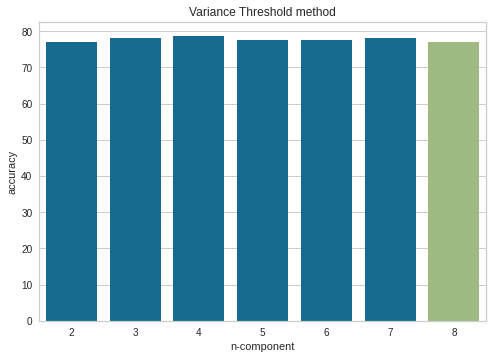

In [87]:
vtmethod(x_train, y_train, x_test, y_test, LogisticRegression())

[76.04166666666666, 77.08333333333334, 76.5625, 76.5625, 75.52083333333334, 76.04166666666666, 75.0]
max mutal 77.08333333333334
[76.04166666666666, 77.08333333333334, 76.5625, 75.0, 74.47916666666666, 73.4375, 75.0]
max anova 77.08333333333334
Best value of n components :  3 from ANOVA


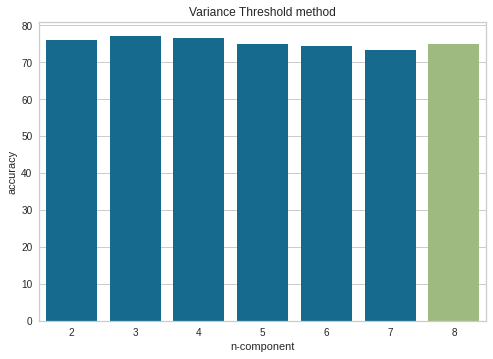

In [88]:
vtmethod(x_train, y_train, x_test, y_test, KNeighborsClassifier())

#### **Apply TSNE on training set**

In [89]:
tsne8 = TSNE(n_components=2,random_state=0)
z8 = tsne8.fit_transform(x_train_v) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'tsne on train with variancethreshold filter data actual labels')]

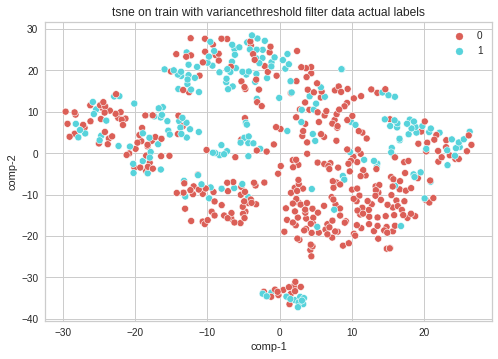

In [90]:
df8 = pd.DataFrame()
df8["y_lr"] = lr_v.predict(x_train_v)
df8["y_knn"] =knn_v.predict(x_train_v)
df8["y_actual"] = y_train
df8["comp-1"] = z8[:,0]
df8["comp-2"] = z8[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df8.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df8).set(title="tsne on train with variancethreshold filter data actual labels") 

[Text(0.5, 1.0, 'tsne on train with variancethreshold filter data preictrd lr label')]

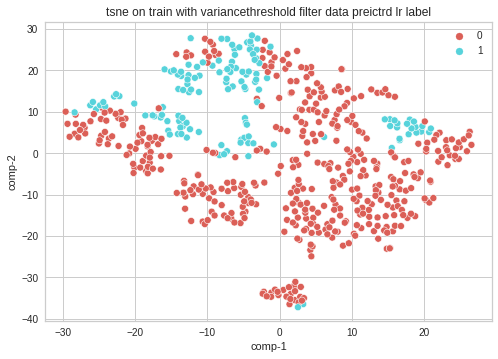

In [91]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df8.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df8).set(title="tsne on train with variancethreshold filter data preictrd lr label") 

[Text(0.5, 1.0, 'tsne on train with variancethreshold filter data predicted knn label')]

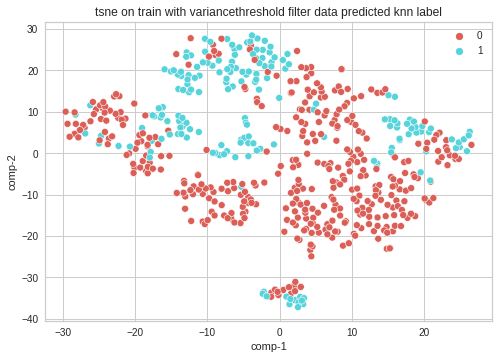

In [92]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df8.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df8).set(title="tsne on train with variancethreshold filter data predicted knn label") 

#### **Apply TSNE on testing set**

In [93]:
tsne9 = TSNE(n_components=2,random_state=0)
z9 = tsne9.fit_transform(x_test_v) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'tsne on test with variancethreshold filter data actual label')]

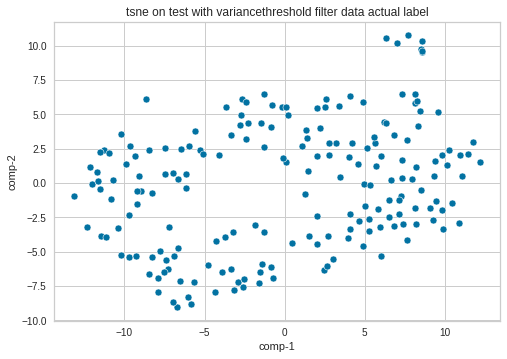

In [94]:
df9 = pd.DataFrame()
df9["y_lr"] = y_pred_v_lr
df9["y_knn"] =y_pred_v_knn
df9["y_actual"] = y_test
df9["comp-1"] = z9[:,0]
df9["comp-2"] = z9[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df9.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df9).set(title="tsne on test with variancethreshold filter data actual label") 

[Text(0.5, 1.0, 'tsne on test with variancethreshold filter data predicted lr label')]

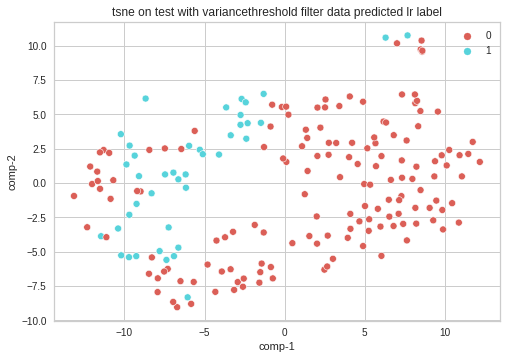

In [95]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df9.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df9).set(title="tsne on test with variancethreshold filter data predicted lr label") 

[Text(0.5, 1.0, 'tsne on test with variancethreshold filter data predicted knn label')]

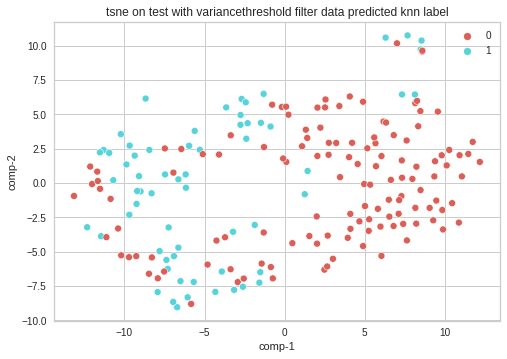

In [96]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df9.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df9).set(title="tsne on test with variancethreshold filter data predicted knn label") 

## **wrapper method Backword feature selection**

Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

In [97]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [98]:
! pip uninstall mlxtend --yes
! pip install mlxtend

Found existing installation: mlxtend 0.20.0
Uninstalling mlxtend-0.20.0:
  Successfully uninstalled mlxtend-0.20.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)


In [99]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def wrapper_select_feature(X_train, y_train, X_test, y_test, label, model,i):
  fs = SFS(model,
           k_features=i,
           forward=label,
           verbose=2,
           scoring='roc_auc',
           cv=4)
  fs.fit(np.array(X_train), y_train.values.ravel())
  filtered_features= X_train.columns[list(fs.k_feature_idx_)]
  l=list(filtered_features)
  X_train_new = X_train.loc[:,l]
  X_test_new = X_test.loc[:,l]
  model.fit(X_train_new, y_train.values.ravel())
  y_pred = model.predict(X_test_new)
  acc = accuracy_score(y_test, y_pred) * 100
  
  return acc,X_train_new,X_test_new

In [100]:
def wsMethod(x_train1, y_train1, x_test1, y_test1,  model_name):
  accuracy_dic={}
  accuracy_list=[]
  accuracy_list2=[]
  feat=[]
  feat2=[]
  feat_test=[]
  feat_test2=[]
  model = model_name
  for i in range(2,9):
    acc,df_X_train_new,df_X_test_new = wrapper_select_feature(x_train1, y_train1, x_test1, y_test1,True , model_name,i)
    accuracy_list.append(acc)
    feat.append(df_X_train_new)
    feat_test.append(df_X_test_new)
    index=accuracy_list.index(max(accuracy_list))
    feat_name=feat[index]
    test_name=feat_test[index]

    acc2,df_X_train_new2,df_X_test_new2 = wrapper_select_feature(x_train1, y_train1, x_test1, y_test1,False , model_name,i)
    accuracy_list2.append(acc2)
    feat2.append(df_X_train_new2)
    feat_test2.append(df_X_test_new2)
    index2=accuracy_list2.index(max(accuracy_list2))
    feat_name2=feat2[index2]
    test_name2=feat_test2[index2]
  print(accuracy_list)
  print('max forward',max(accuracy_list))
  #print('list: ',feat_name)
  print(accuracy_list2)
  print('max backward',max(accuracy_list2))
  #print('list: ',feat_name2)

  if(max(accuracy_list)>max(accuracy_list2)):
    best_n=accuracy_list.index(max(accuracy_list))+2
    print("Best value of n components: ",best_n, "forward wrapper method")
    #accuracy_list.append(accuracy_score(y_test, y_pred_LR))
    accuracy_dic={"n-component":[2,3,4,5,6,7,8],"accuracy":accuracy_list}
    accuracy_df=pd.DataFrame(accuracy_dic)
    ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,palette=["b" if x!=8 else 'g' for x in accuracy_df['n-component']]).set(title='feature selection using forward wrapper method')
    return feat_name,test_name
  else:
    best_n=  accuracy_list2.index(max(accuracy_list2))+2
    print("Best value of n components : ",best_n, 'backward wrapper method')
    #accuracy_list.append(accuracy_score(y_test, y_pred_LR))
    accuracy_dic={"n-component":[2,3,4,5,6,7,8],"accuracy":accuracy_list2}
    accuracy_df=pd.DataFrame(accuracy_dic)
    ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df, palette=["b" if x!=8 else 'g' for x in accuracy_df['n-component']]).set(title='feature selection using backward wrapper method')
    return feat_name2,test_name2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2022-06-28 16:07:38] Features: 1/2 -- score: 0.7811244398239735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s finished

[2022-06-28 16:07:38] Features: 2/2 -- score: 0.80623147886471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2022-06-28 16:07:39] Features: 7/2 -- score: 0.824808766334262[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out

[77.08333333333334, 78.64583333333334, 77.60416666666666, 77.60416666666666, 77.60416666666666, 77.60416666666666, 77.08333333333334]
max forward 78.64583333333334
[77.08333333333334, 78.64583333333334, 77.60416666666666, 77.60416666666666, 77.60416666666666, 77.60416666666666, 77.08333333333334]
max backward 78.64583333333334
Best value of n components :  3 backward wrapper method


(     Pregnancies   Glucose       BMI
 0       0.411765  0.623116  0.380030
 1       0.294118  0.542714  0.538003
 2       0.058824  0.437186  0.554396
 3       0.058824  0.723618  0.687034
 4       0.058824  0.557789  0.357675
 ..           ...       ...       ...
 571     0.117647  0.874372  0.663189
 572     0.352941  0.628141  0.503726
 573     0.529412  0.763819  0.509687
 574     0.058824  0.467337  0.453055
 575     0.117647  0.527638  0.520119
 
 [576 rows x 3 columns],      Pregnancies   Glucose       BMI
 576     0.000000  0.537688  0.545455
 577     0.000000  0.522613  0.414307
 578     0.176471  0.482412  0.368107
 579     0.411765  0.974874  0.535022
 580     0.058824  0.477387  0.385991
 ..           ...       ...       ...
 763     0.000000  0.587940  0.673621
 764     0.705882  0.422111  0.442623
 765     0.352941  0.618090  0.500745
 766     0.058824  0.984925  0.543964
 767     0.176471  0.648241  0.393443
 
 [192 rows x 3 columns])

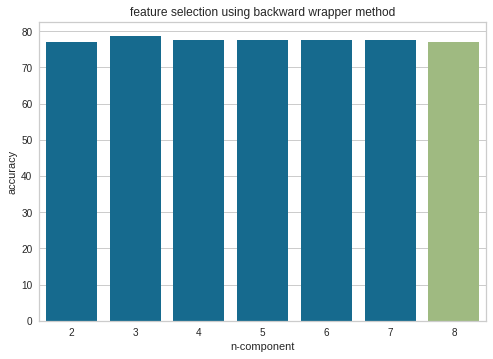

In [101]:
wsMethod(x_train, y_train, x_test, y_test, LogisticRegression())

In [102]:
from mlxtend.feature_selection import SequentialFeatureSelector
lr_be =LogisticRegression(class_weight='balanced',solver='lbfgs',n_jobs=-1,random_state=0,max_iter=500)
lr_be.fit(x_train,y_train)
b = SequentialFeatureSelector(lr_be,k_features='best',forward=False,n_jobs=-1)
b.fit(x_train,y_train)
feature = list(b.k_feature_names_)
x_train_b_lr = x_train[feature]
x_test_b_lr = x_test[feature]
lr_be.fit(x_train_b_lr,y_train)
y_pred_b_lr=lr_be.predict(x_test_b_lr)

In [103]:
lr_b_accracy=accuracy_score(y_test,y_pred_b_lr)
print(lr_b_accracy)
print(classification_report(y_train,lr_be.predict(x_train_b_lr)))
print(classification_report(y_test,y_pred_b_lr))

0.734375
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       373
           1       0.69      0.76      0.72       203

    accuracy                           0.79       576
   macro avg       0.77      0.79      0.78       576
weighted avg       0.80      0.79      0.80       576

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       127
           1       0.59      0.68      0.63        65

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.75      0.73      0.74       192



In [104]:
knn_be =KNeighborsClassifier()
knn_be.fit(x_train,y_train)
b = SequentialFeatureSelector(knn_be,k_features='best',forward=False)
b.fit(x_train,y_train)
feature = list(b.k_feature_names_)
x_train_b_knn = x_train[feature]
x_test_b_knn = x_test[feature]
knn_be.fit(x_train_b_knn,y_train)
y_pred_b_knn=knn_be.predict(x_test_b_knn)

In [105]:
feature

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']

In [106]:
knn_b_accracy=accuracy_score(y_test,y_pred_b_lr)
print(knn_b_accracy)
print(classification_report(y_train,knn_be.predict(x_train_b_knn)))
print(classification_report(y_test,y_pred_b_knn))

0.734375
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       373
           1       0.77      0.68      0.72       203

    accuracy                           0.82       576
   macro avg       0.80      0.79      0.79       576
weighted avg       0.81      0.82      0.81       576

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       127
           1       0.69      0.54      0.60        65

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s finished

[2022-06-28 16:08:14] Features: 1/2 -- score: 0.6961256846595879[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2022-06-28 16:08:14] Features: 2/2 -- score: 0.762452320553021[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2022-06-28 16:08:14] Features: 7/2 -- score: 0.777720958321558[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

[73.95833333333334, 76.5625, 76.5625, 75.0, 74.47916666666666, 76.04166666666666, 75.0]
max forward 76.5625
[76.04166666666666, 71.35416666666666, 72.91666666666666, 75.0, 74.47916666666666, 76.04166666666666, 75.0]
max backward 76.04166666666666
Best value of n components:  3 forward wrapper method


(     Pregnancies   Glucose       Age
 0       0.411765  0.623116  0.266667
 1       0.294118  0.542714  0.200000
 2       0.058824  0.437186  0.016667
 3       0.058824  0.723618  0.416667
 4       0.058824  0.557789  0.033333
 ..           ...       ...       ...
 571     0.117647  0.874372  0.050000
 572     0.352941  0.628141  0.550000
 573     0.529412  0.763819  0.200000
 574     0.058824  0.467337  0.033333
 575     0.117647  0.527638  0.066667
 
 [576 rows x 3 columns],      Pregnancies   Glucose       Age
 576     0.000000  0.537688  0.066667
 577     0.000000  0.522613  0.033333
 578     0.176471  0.482412  0.300000
 579     0.411765  0.974874  0.333333
 580     0.058824  0.477387  0.250000
 ..           ...       ...       ...
 763     0.000000  0.587940  0.050000
 764     0.705882  0.422111  0.416667
 765     0.352941  0.618090  0.216667
 766     0.058824  0.984925  0.133333
 767     0.176471  0.648241  0.116667
 
 [192 rows x 3 columns])

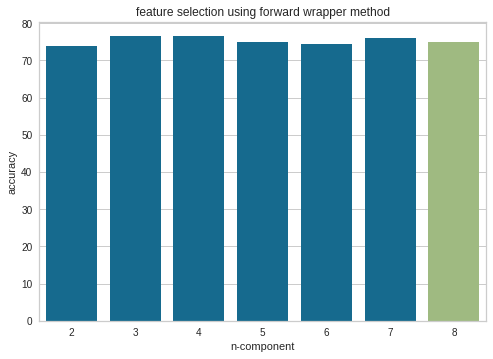

In [107]:
wsMethod(x_train, y_train, x_test, y_test, KNeighborsClassifier())

### **Apply TSNE on training set**

In [108]:
tsne10 = TSNE(n_components=2,random_state=0)
z10 = tsne10.fit_transform(x_train_b_knn) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'TSNE on train with wraper BE filter data actual labels')]

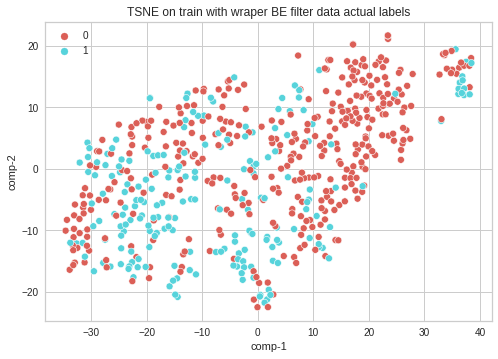

In [109]:
df10 = pd.DataFrame()
df10["y_lr"] = lr_be.predict(x_train_b_lr)
df10["y_knn"] =knn_be.predict(x_train_b_knn)
df10["y_actual"] = y_train
df10["comp-1"] = z10[:,0]
df10["comp-2"] = z10[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df10.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df10).set(title="TSNE on train with wraper BE filter data actual labels") 

[Text(0.5, 1.0, 'TSNE on train with wraper BE filter data predicted lr label')]

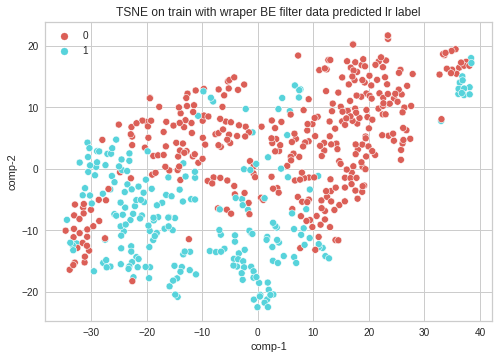

In [110]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df10.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df10).set(title="TSNE on train with wraper BE filter data predicted lr label") 

[Text(0.5, 1.0, 'TSNE on train with wraper BE filter data predicted knn label')]

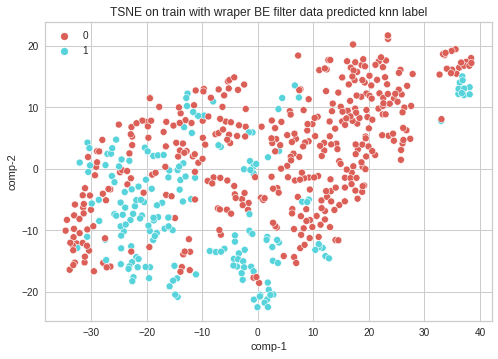

In [111]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df10.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df10).set(title="TSNE on train with wraper BE filter data predicted knn label") 

### **Apply TSNE on tseting set**

In [112]:
tsne11 = TSNE(n_components=2,random_state=0)
z11 = tsne11.fit_transform(x_test_b_knn) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'TSNE on test with wraper BE filter data actual label')]

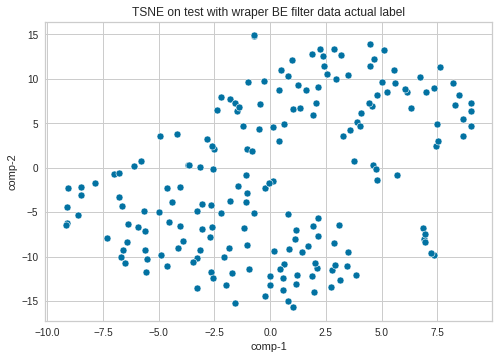

In [113]:
df11 = pd.DataFrame()
df11["y_lr"] = y_pred_b_lr
df11["y_knn"] =y_pred_b_knn
df11["y_actual"] = y_test
df11["comp-1"] = z11[:,0]
df11["comp-2"] = z11[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df11.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df11).set(title="TSNE on test with wraper BE filter data actual label") 

[Text(0.5, 1.0, 'TSNE on test with wraper BE filter data predicted lr label')]

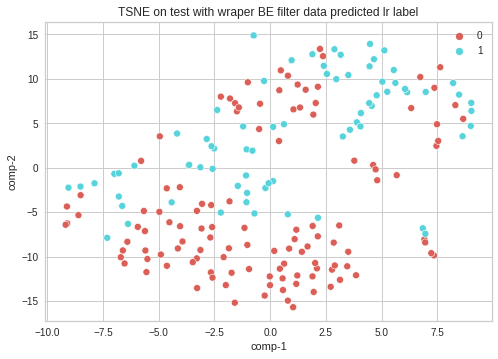

In [114]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df11.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df11).set(title="TSNE on test with wraper BE filter data predicted lr label") 

[Text(0.5, 1.0, 'TSNE on test with wraper BE filter data predicted knn label')]

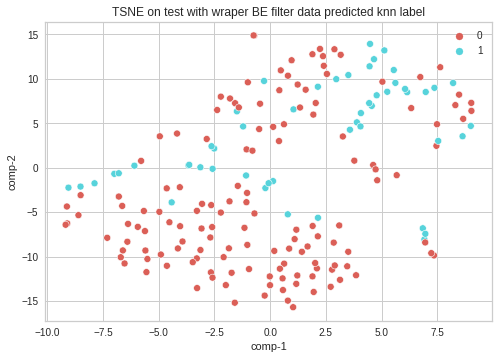

In [115]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df11.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df11).set(title="TSNE on test with wraper BE filter data predicted knn label") 

## **Recursive feature elimination**

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

In [116]:
# RFE
from sklearn.feature_selection import RFE
lr_r = LogisticRegression()
rfe =RFE(lr_r,n_features_to_select=4)
rfe.fit(x_train,y_train)
feature_r =list(rfe.feature_names_in_)
x_train_r = x_train[feature_r]
x_test_r = x_test[feature_r]
lr_r.fit(x_train_r,y_train)
y_pred_lr_r = rfe.predict(x_test_r)

In [117]:
lr_r_accracy=accuracy_score(y_test,y_pred_lr_r)
print(lr_r_accracy)
print(classification_report(y_train,lr_r.predict(x_train_r)))
print(classification_report(y_test,y_pred_lr_r))

0.7760416666666666
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       373
           1       0.76      0.53      0.62       203

    accuracy                           0.78       576
   macro avg       0.77      0.72      0.73       576
weighted avg       0.77      0.78      0.76       576

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       127
           1       0.76      0.49      0.60        65

    accuracy                           0.78       192
   macro avg       0.77      0.71      0.72       192
weighted avg       0.77      0.78      0.76       192



In [118]:
# can`t apply RFE with KNN because doesn`t have a feature importance attribuite
from sklearn.tree import DecisionTreeClassifier
knn_r = DecisionTreeClassifier()
rfe_knn =RFE(knn_r,n_features_to_select=4)
rfe_knn.fit_transform(x_train,y_train)
feature_r =list(rfe_knn.feature_names_in_)
x_train_r_knn = x_train[feature_r]
x_test_r_knn = x_test[feature_r]
knn_r.fit(x_train_r_knn,y_train)
y_pred_knn_r = rfe_knn.predict(x_test_r_knn)

In [119]:
knn_r_accracy=accuracy_score(y_test,y_pred_knn_r)
print(knn_r_accracy)
print(classification_report(y_train,knn_r.predict(x_train_r_knn)))
print(classification_report(y_test,y_pred_knn_r))

0.6822916666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       203

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       127
           1       0.53      0.48      0.50        65

    accuracy                           0.68       192
   macro avg       0.64      0.63      0.64       192
weighted avg       0.67      0.68      0.68       192



### **TSNE on training data**

In [120]:
tsne12 = TSNE(n_components=2,random_state=0)
z12 = tsne12.fit_transform(x_train_r_knn) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'tsne on train with wraper RE filter data actual label')]

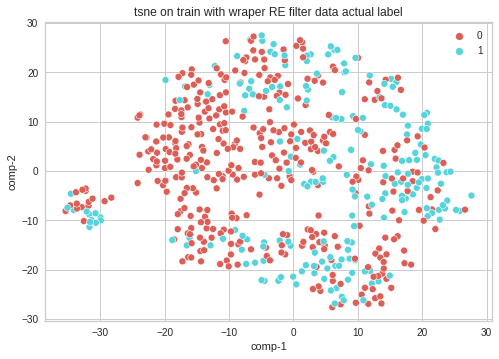

In [121]:
df12 = pd.DataFrame()
df12["y_lr"] = lr_r.predict(x_train_r)
df12["y_knn"] =knn_r.predict(x_train_r_knn)
df12["y_actual"] = y_train
df12["comp-1"] = z12[:,0]
df12["comp-2"] = z12[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df12.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df12).set(title="tsne on train with wraper RE filter data actual label") 

[Text(0.5, 1.0, 'tsne on train with wraper RE filter data predicted lr label')]

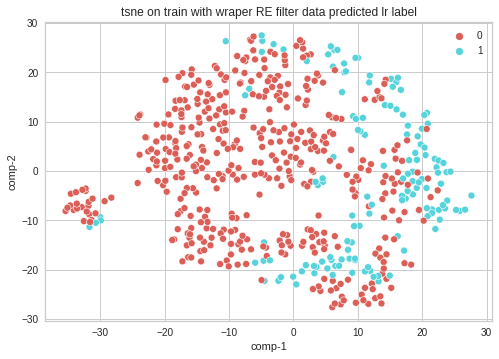

In [122]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df12.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df12).set(title="tsne on train with wraper RE filter data predicted lr label") 

[Text(0.5, 1.0, 'tsne on train with wraper RE filter data predicted knn label')]

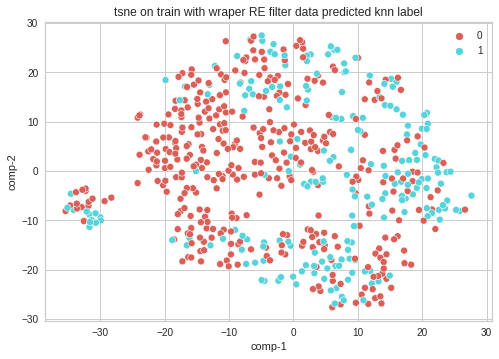

In [123]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df12.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df12).set(title="tsne on train with wraper RE filter data predicted knn label") 

### **TSNE on testing data**

In [124]:
tsne13 = TSNE(n_components=2,random_state=0)
z13 = tsne13.fit_transform(x_test_r_knn) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'tsne on test with wraper RE filter data actual label')]

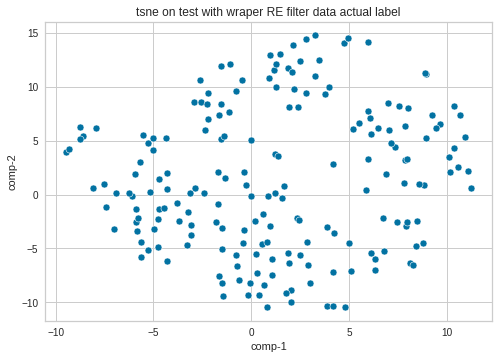

In [125]:
df13 = pd.DataFrame()
df13["y_lr"] = y_pred_lr_r
df13["y_knn"] =y_pred_knn_r
df13["y_actual"] = y_test
df13["comp-1"] = z13[:,0]
df13["comp-2"] = z13[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df13.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df13).set(title="tsne on test with wraper RE filter data actual label") 

[Text(0.5, 1.0, 'tsne on test with wraper RE filter data predicted lr label')]

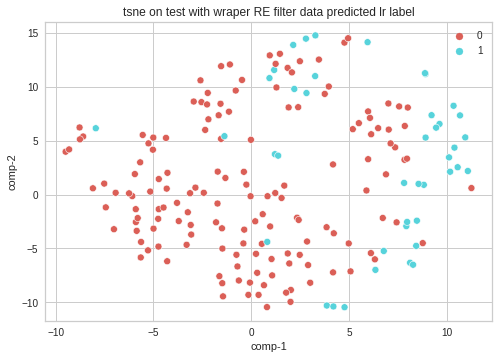

In [126]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df13.y_lr.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df13).set(title="tsne on test with wraper RE filter data predicted lr label") 

[Text(0.5, 1.0, 'tsne on test with wraper RE filter data predicted knn label')]

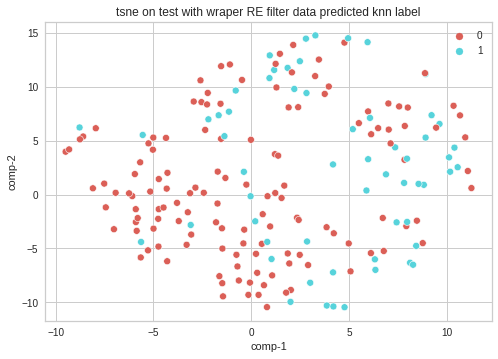

In [127]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df13.y_knn.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df13).set(title="tsne on test with wraper RE filter data predicted knn label") 

# **Question 5:Choose the best number of cluster for k-means clustering algorithm on the processed data**

In [128]:
x_train_b_knn

Pregnancies   Glucose  BloodPressure   Insulin       BMI       Age
0       0.411765  0.623116       0.573770  0.254137  0.380030  0.266667
1       0.294118  0.542714       0.590164  0.088652  0.538003  0.200000
2       0.058824  0.437186       0.491803  0.088652  0.554396  0.016667
3       0.058824  0.723618       0.672131  0.212766  0.687034  0.416667
4       0.058824  0.557789       0.508197  0.215130  0.357675  0.033333
..           ...       ...            ...       ...       ...       ...
571     0.117647  0.874372       0.721311  0.141844  0.663189  0.050000
572     0.352941  0.628141       0.622951  0.000000  0.503726  0.550000
573     0.529412  0.763819       0.639344  0.202128  0.509687  0.200000
574     0.058824  0.467337       0.573770  0.000000  0.453055  0.033333
575     0.117647  0.527638       0.475410  0.111111  0.520119  0.066667

[576 rows x 6 columns]

Text(0, 0.5, 'silhouette score')

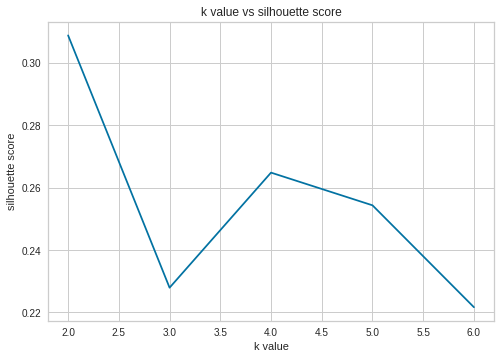

In [129]:
wcss=[]
scores =[]
for i in range(2,7):
  kmean = KMeans(n_clusters=i)
  y_pred = kmean.fit_predict(x_train_b_knn)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(x_train_b_knn,y_pred))


plt.plot(range(2,7),scores)
plt.title('k value vs silhouette score')
plt.xlabel('k value')
plt.ylabel('silhouette score')


Text(0, 0.5, 'wcss')

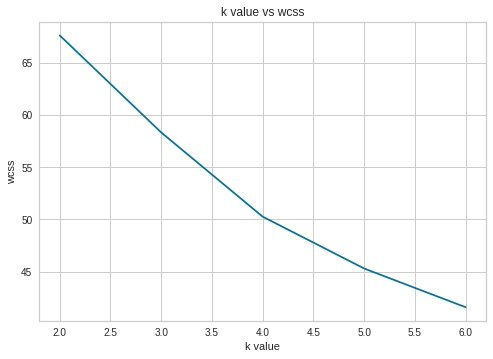

In [130]:
plt.plot(range(2,7),wcss)
plt.title('k value vs wcss')
plt.xlabel('k value')
plt.ylabel('wcss')

/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


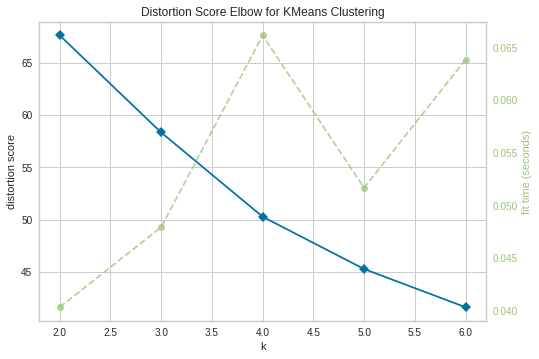

In [131]:
visualizer = KElbowVisualizer(kmean, k=(2,7))
visualizer.fit(x_train_b_knn)       
visualizer.show()

In [132]:
# decide to choose K =2 because we have the highest silhouette score
kmean =KMeans(n_clusters=2)
kmean.fit(x_train_b_knn)
y_pred_train = kmean.predict(x_train_b_knn)
y_pred_test = kmean.predict(x_test_b_knn)


In [133]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [134]:
y_pred_train

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

### **TSNE on training data**

In [135]:
tsne14 = TSNE(n_components=2,random_state=0)
z14 = tsne14.fit_transform(x_train_b_knn) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'tsne on the best number of clusters on x_train')]

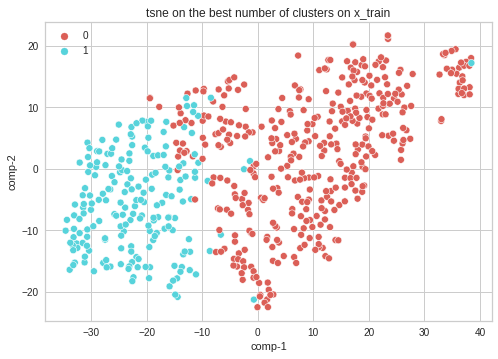

In [136]:
df14 = pd.DataFrame()
df14["y_actual"] = y_pred_train
df14["comp-1"] = z14[:,0]
df14["comp-2"] = z14[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df14.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df14).set(title="tsne on the best number of clusters on x_train") 

### **TSNE on testing data**

In [137]:
tsne15 = TSNE(n_components=2,random_state=0)
z15 = tsne15.fit_transform(x_test_b_knn) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'tsne on the best number of clusters on x_test')]

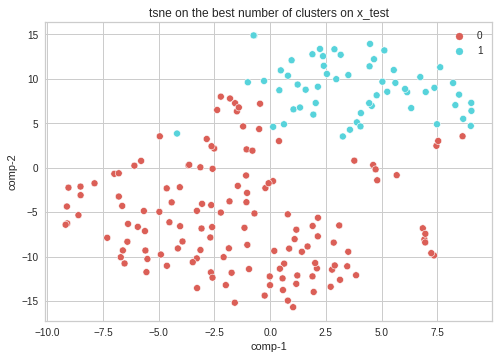

In [138]:
df15 = pd.DataFrame()
df15["y_actual"] = y_pred_test
df15["comp-1"] = z15[:,0]
df15["comp-2"] = z15[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df15.y_actual.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df15).set(title="tsne on the best number of clusters on x_test") 

# **Qustion 6: Choose the best number of neurons for SOM algorithm, using the best features**

An SOM is mainly used for data visualization and provides a quick visual summary of the training instances. In a 2D rectangular grid, each cell is represented by a weight vector. For a trained SOM, each cell weight represents a summary of a few training examples. Cells in the close vicinity of each other have similar weights, and like examples can be mapped to cells in a small neighborhood of each other.

In [139]:
! pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


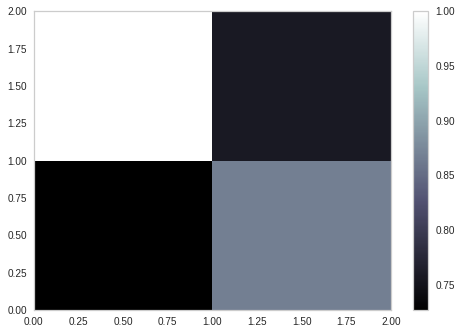

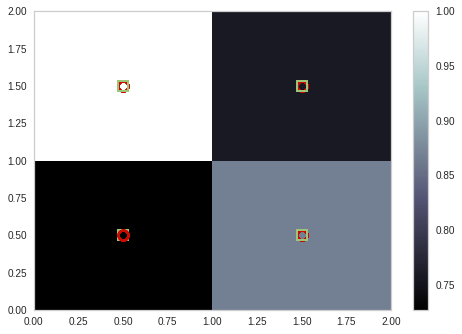

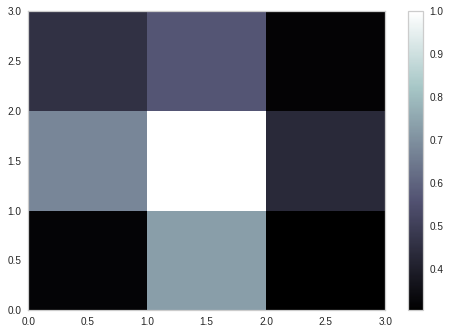

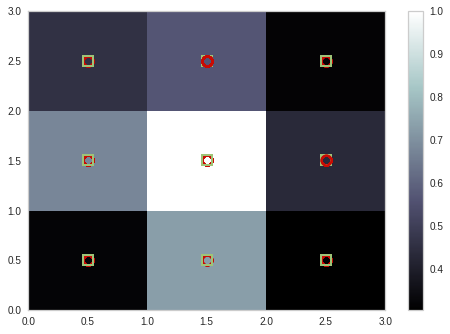

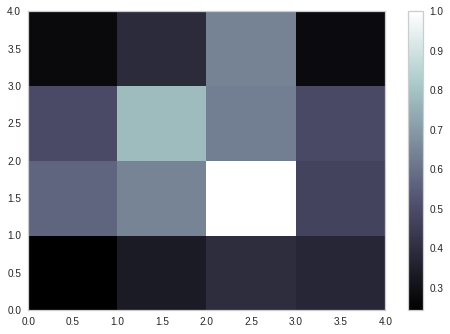

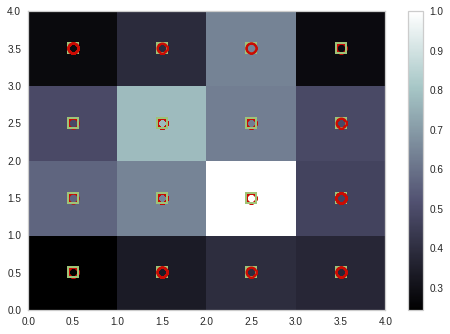

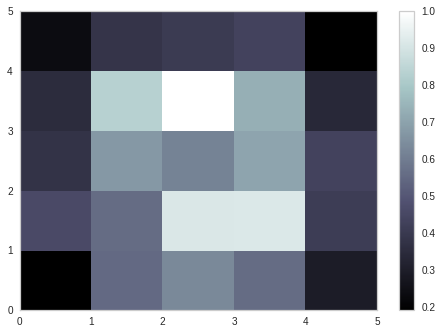

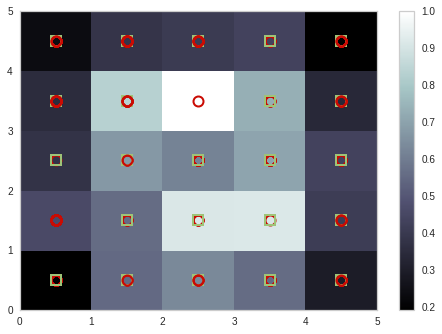

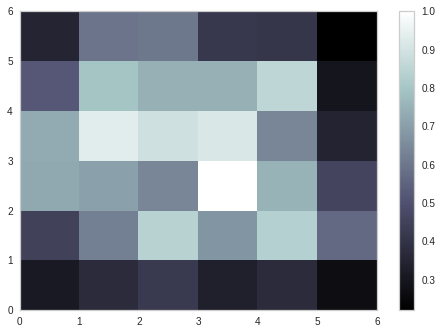

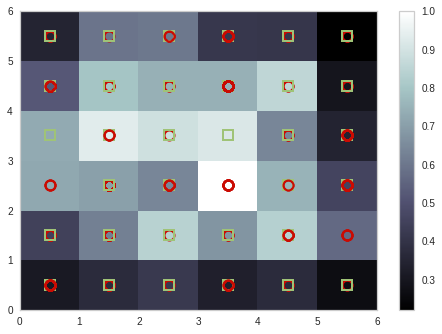

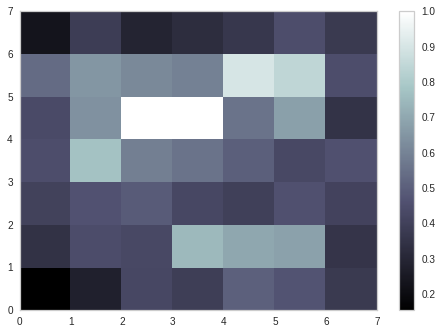

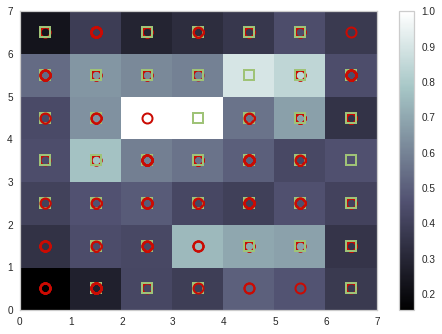

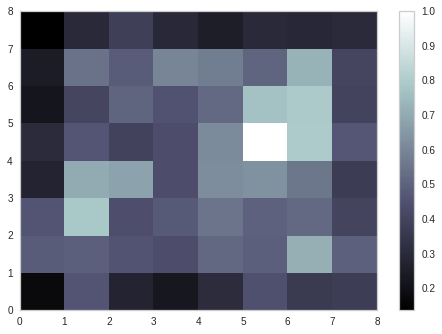

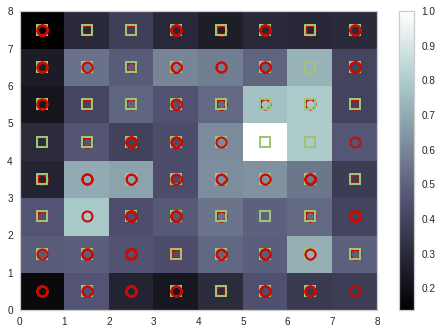

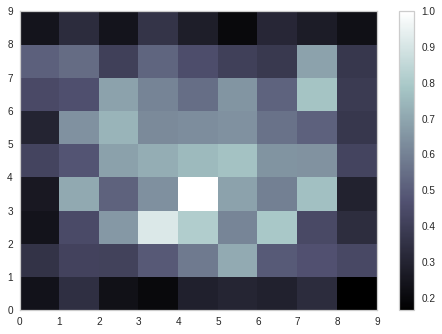

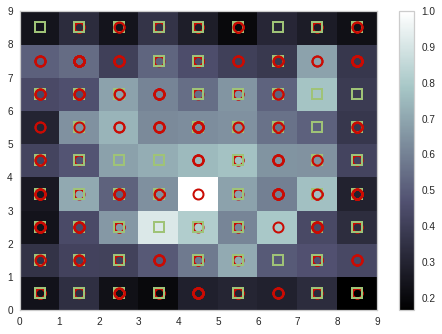

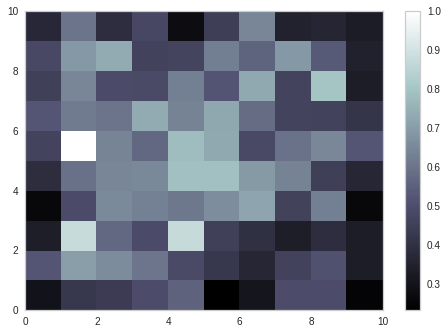

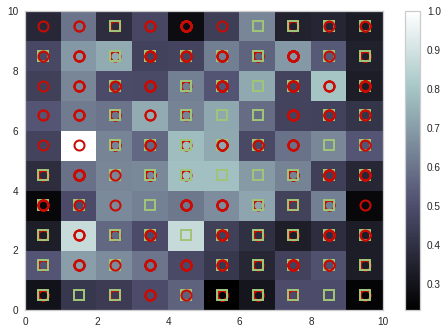

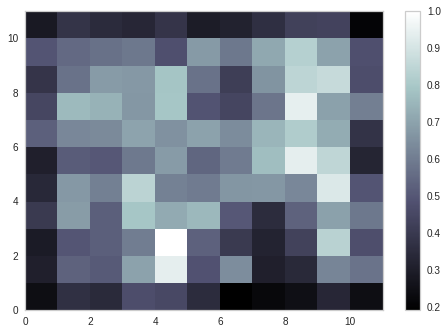

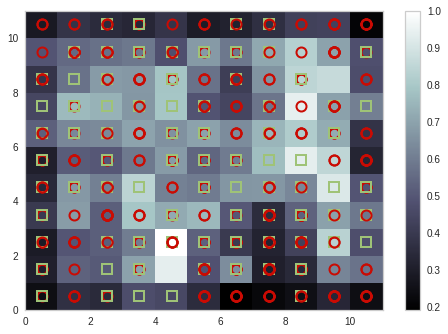

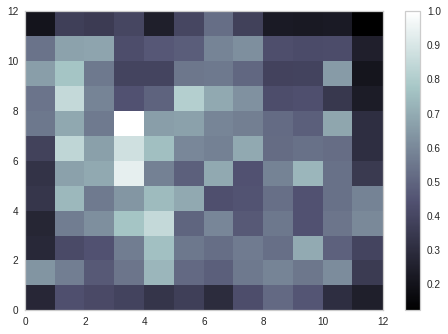

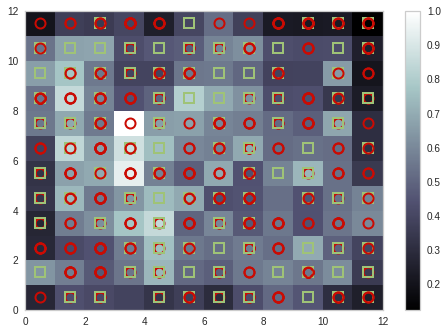

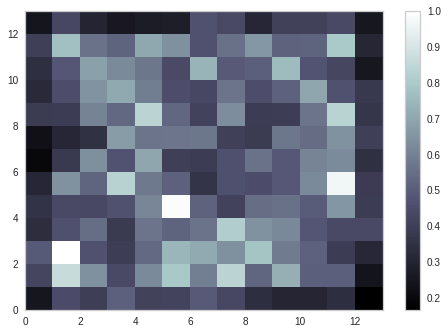

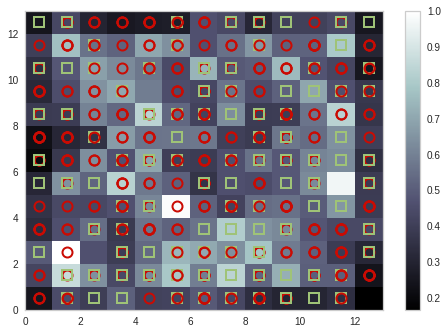

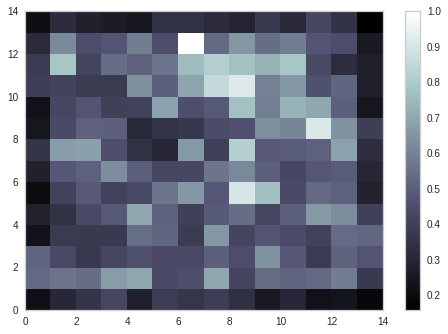

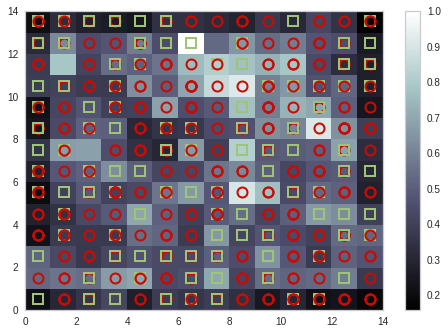

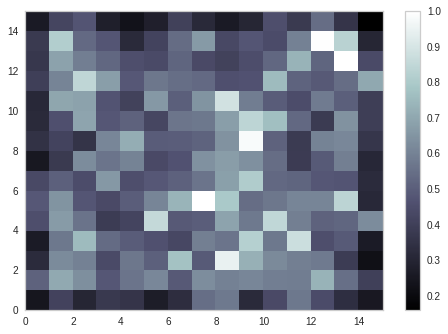

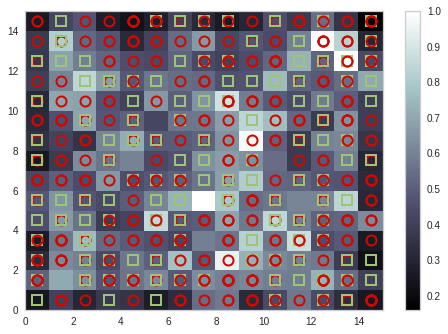

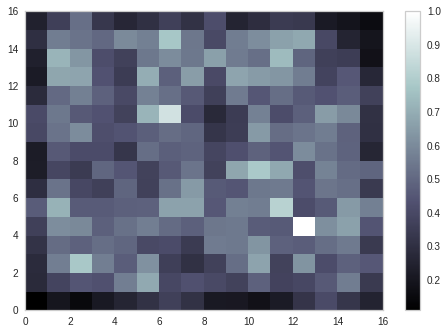

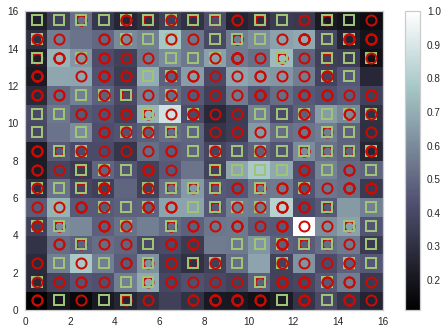

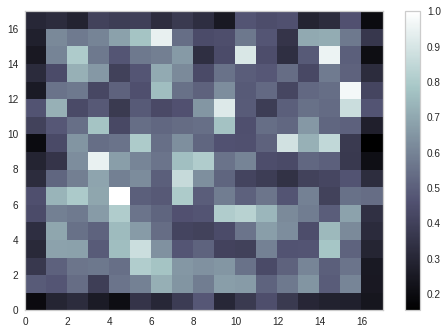

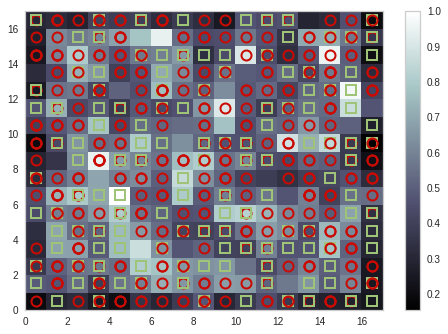

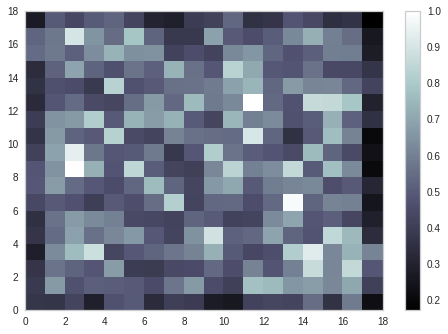

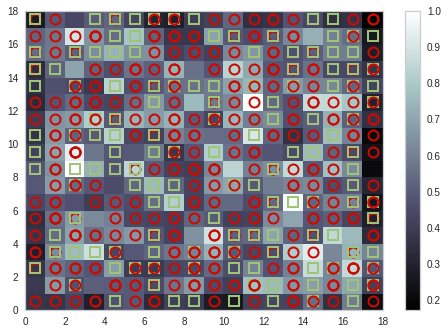

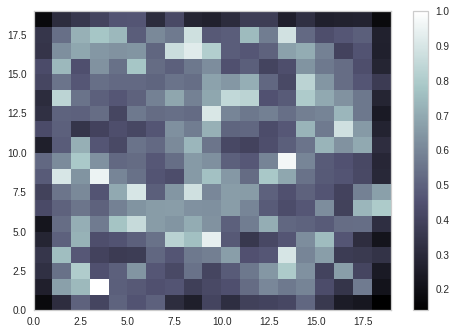

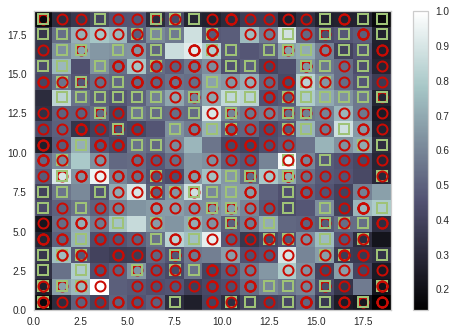

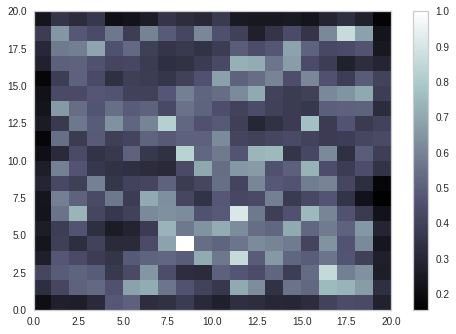

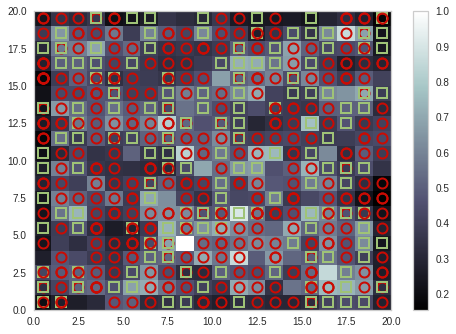

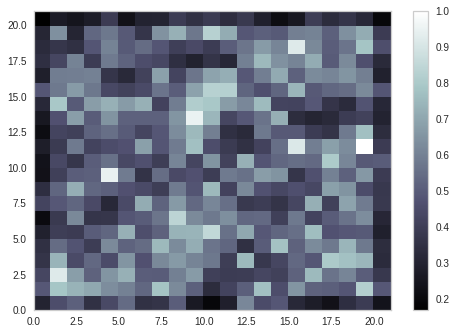

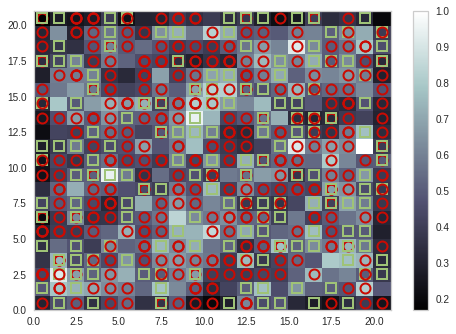

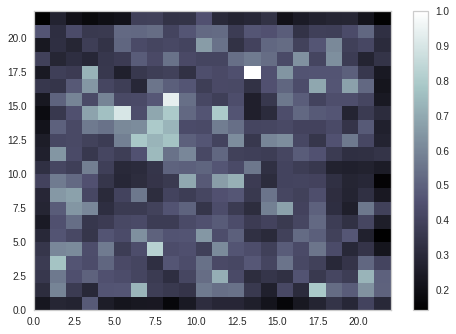

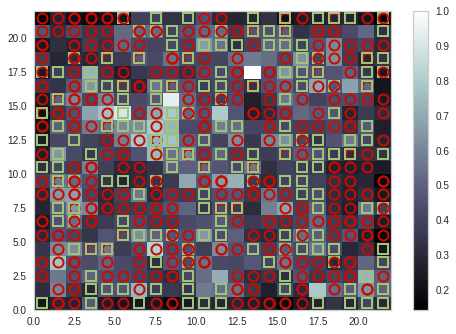

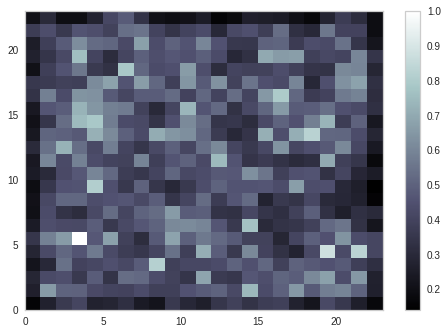

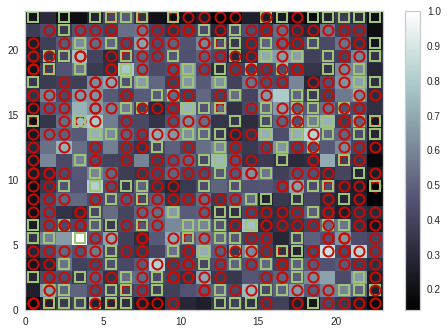

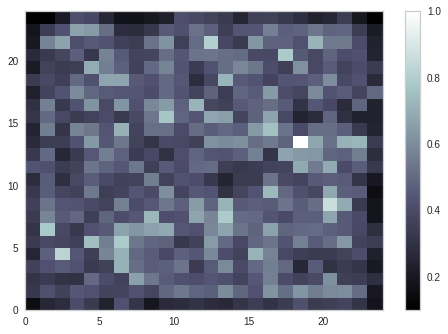

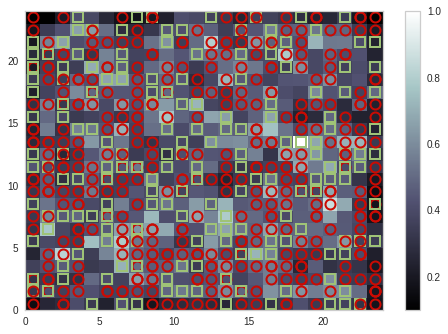

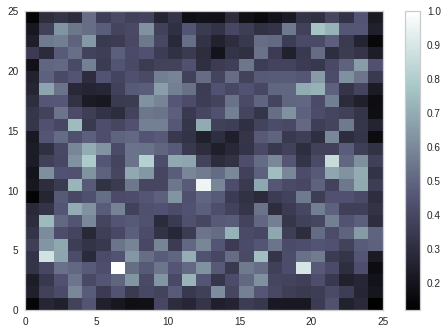

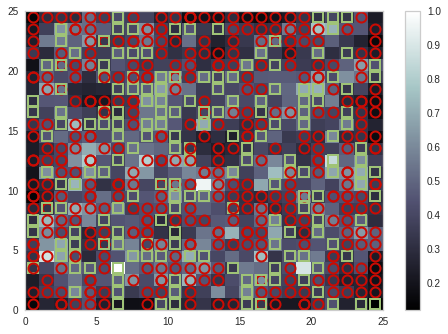

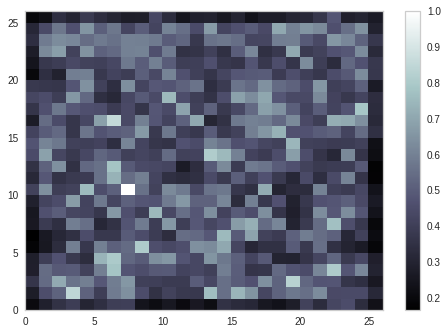

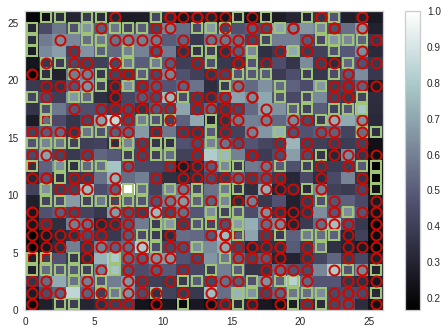

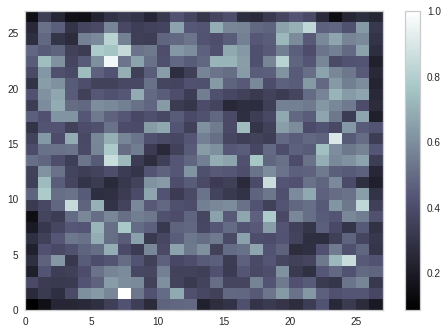

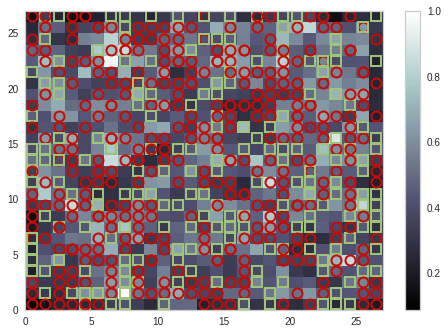

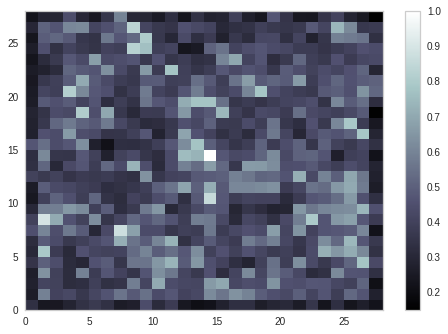

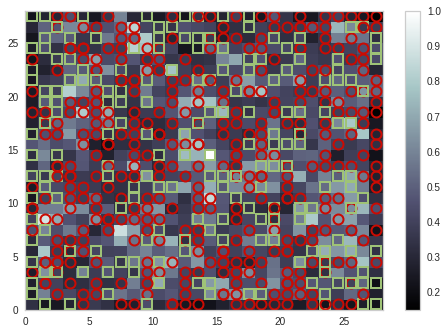

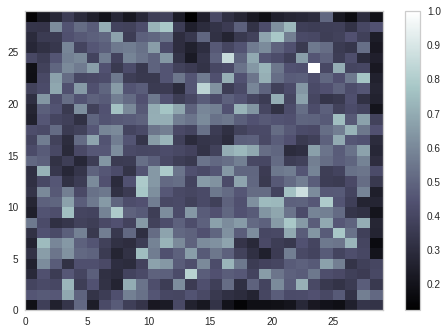

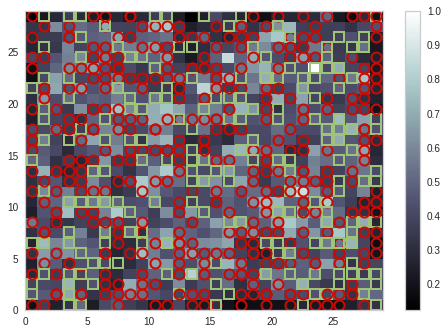

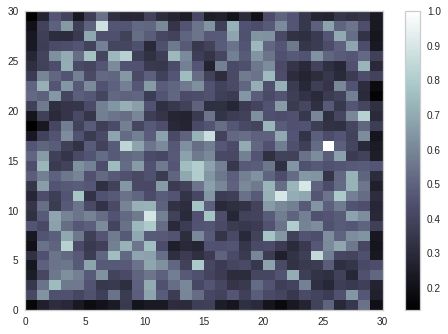

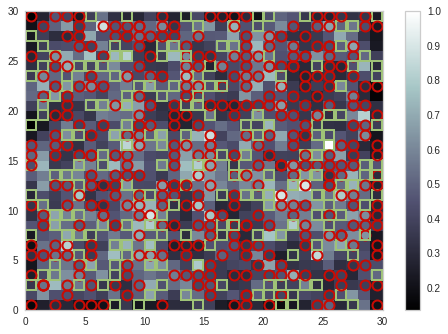

In [140]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(x_train_b_knn)
from minisom import MiniSom 
scores = [] 
for i in range(2,31):
  som = MiniSom(i,i, 6, sigma=0.3, learning_rate=0.5) # initialization of ixi SOM
  som.random_weights_init(X)

# Training

  som.train_random(X, 5000)
  # Weights are:
  wts = som.get_weights
  
# Returns the distance map from the weights:
  som.distance_map()
  from pylab import plot, axis, show, pcolor, colorbar, bone
  bone()
  pcolor(som.distance_map().T)       # Distance map as background
  colorbar()
  show()
  bone()

  pcolor(som.distance_map().T)

  colorbar() #gives legend

  markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square

  colors = ['r', 'g']

  for i, x in enumerate(X):

      w = som.winner(x)

      plot(w[0] + 0.5,

          w[1] + 0.5,

          markers[y[i]],

          markeredgecolor = colors[y[i]],

          markerfacecolor = 'None',

          markersize = 10,

          markeredgewidth = 2)

  show()
  mappings = som.win_map(X)
  w = np.array([som.winner(x) for x in X]).T
  index = np.ravel_multi_index(w,(i,i))

  scores.append(silhouette_score(X,index))


In [141]:
x_train_b_knn

Pregnancies   Glucose  BloodPressure   Insulin       BMI       Age
0       0.411765  0.623116       0.573770  0.254137  0.380030  0.266667
1       0.294118  0.542714       0.590164  0.088652  0.538003  0.200000
2       0.058824  0.437186       0.491803  0.088652  0.554396  0.016667
3       0.058824  0.723618       0.672131  0.212766  0.687034  0.416667
4       0.058824  0.557789       0.508197  0.215130  0.357675  0.033333
..           ...       ...            ...       ...       ...       ...
571     0.117647  0.874372       0.721311  0.141844  0.663189  0.050000
572     0.352941  0.628141       0.622951  0.000000  0.503726  0.550000
573     0.529412  0.763819       0.639344  0.202128  0.509687  0.200000
574     0.058824  0.467337       0.573770  0.000000  0.453055  0.033333
575     0.117647  0.527638       0.475410  0.111111  0.520119  0.066667

[576 rows x 6 columns]

Text(0.5, 1.0, 'number of neuros vs silhouette score')

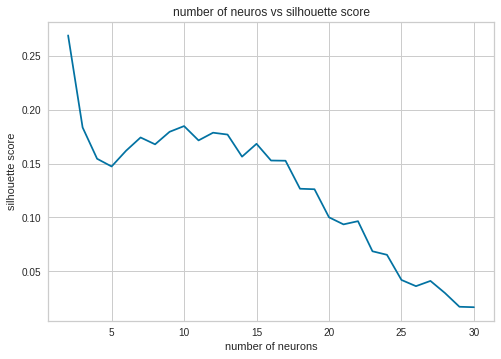

In [142]:
# the best number of neuron is 2 based on the highest silhouette score
plt.plot(range(2,31),scores)
plt.xlabel('number of neurons')
plt.ylabel('silhouette score')
plt.title('number of neuros vs silhouette score')

In [143]:
pca1 = PCA(n_components=2)
pca1 = pca1.fit_transform(x_train_b_knn)

In [144]:
som = MiniSom(2,1, 6, sigma=0.3, learning_rate=0.5,random_seed=0) # initialization of 2*1 SOM
intial_weight = som.get_weights().copy()
som.train_batch(np.array(x_train_b_knn), 1000) # trains the SOM with 1000 iterations
final_weight = som.get_weights()
w = np.array([som.winner(x) for x in np.array(x_train_b_knn)]).T
index = np.ravel_multi_index(w,(2,1))

In [145]:
index

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [146]:
intial_weight

array([[[ 0.16419828,  0.72385141,  0.34567421,  0.15097751,
         -0.25680907,  0.49075687]],

       [[-0.09085602,  0.57031478,  0.67496669, -0.1696774 ,
          0.4246722 ,  0.04206313]]])

In [147]:
final_weight

array([[[0.47710267, 0.71042386, 0.59288791, 0.08145516, 0.46140247,
         0.36316582]],

       [[0.13668112, 0.6537922 , 0.54311031, 0.13120688, 0.47819656,
         0.12776533]]])

### **TSNE plot for all data with two components for the neuron**

In [148]:
tsne20 = TSNE(n_components=2,random_state=0)
z20 = tsne20.fit_transform(np.append(X,intial_weight.reshape(2,6),axis=0)) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [149]:
init_weight_x =  z20[-2:]

In [150]:
data = z20[:-2]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'tsn component1')

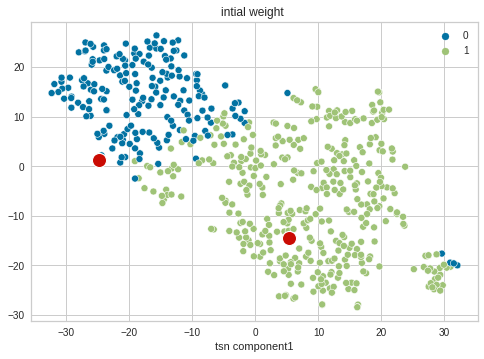

In [151]:
plt.title('intial weight ')
sns.scatterplot(data[:,0],data[:,1],hue = index)
sns.scatterplot(init_weight_x[:,0],init_weight_x[:,1],s=200,color = 'r')
plt.xlabel('tsn component1')
plt.xlabel('tsn component1')

### **TSNE plot for all data with two components for the neuron with PCA**

In [152]:
tsne21 = TSNE(n_components=2,random_state=0)
z21 = tsne21.fit_transform(np.append(X,final_weight.reshape(2,6),axis=0)) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [153]:
final_weight_x =  z21[-2:]

In [154]:
data1 = z21[:-2]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tsn component2')

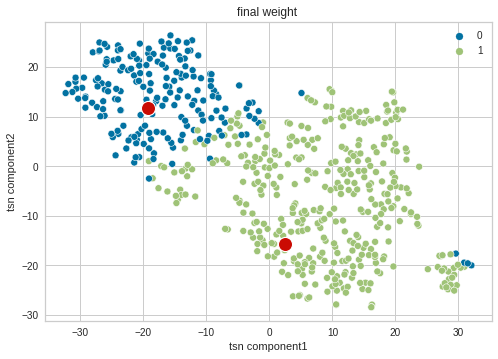

In [155]:
plt.title('final weight ')
sns.scatterplot(data[:,0],data[:,1],hue = index)
sns.scatterplot(final_weight_x[:,0],final_weight_x[:,1],s=200,color = 'r')
plt.xlabel('tsn component1')
plt.ylabel('tsn component2')

In [156]:
som = MiniSom(2,1, 2, sigma=0.3, learning_rate=0.5,random_seed=0) # initialization of 2*1 SOM
intial_weight = som.get_weights().copy()
som.train_batch(pca1, 1000) # trains the SOM with 1000 iterations
final_weight = som.get_weights()
w = np.array([som.winner(x) for x in pca1]).T
index = np.ravel_multi_index(w,(2,1))

In [157]:
intial_weight

array([[[0.22121958, 0.97522402]],

       [[0.91640536, 0.40025144]]])

In [158]:
intial_weight[1]

array([[0.91640536, 0.40025144]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'tsn component1')

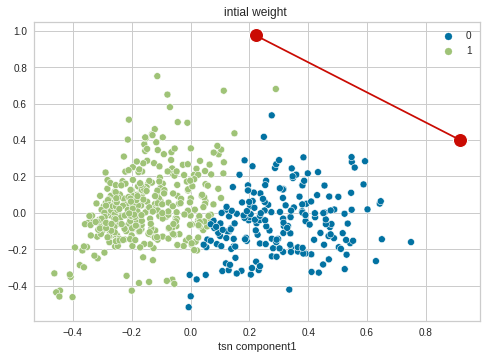

In [159]:
plt.title('intial weight ')
sns.scatterplot(pca1[:,0],pca1[:,1],hue = index)
sns.scatterplot([intial_weight[0][0][0]],[intial_weight[0][0][1]],s=200,color = 'r')
sns.scatterplot([intial_weight[1][0][0]],[intial_weight[1][0][1]],s=200,color = 'r')
sns.lineplot(intial_weight[:,:,0].flatten(),intial_weight[:,:,1].flatten(),color = 'r')
plt.xlabel('tsn component1')
plt.xlabel('tsn component1')

In [160]:
final_weight[:,:,1].flatten()

array([-0.04097306,  0.08438843])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'tsn component1')

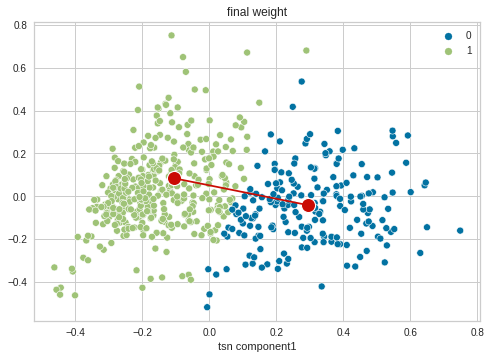

In [161]:
plt.title('final weight')
sns.scatterplot(pca1[:,0],pca1[:,1],hue = index)
sns.scatterplot([final_weight[0][0][0]],[final_weight[0][0][1]],s=200,color = 'r')
sns.scatterplot([final_weight[1][0][0]],[final_weight[1][0][1]],s=200,color = 'r')
sns.lineplot(final_weight[:,:,0].flatten(),final_weight[:,:,1].flatten(),color = 'r')
plt.xlabel('tsn component1')
plt.xlabel('tsn component1')

# **Question 7: Tune the epsilon (0.3-0.7) and minpoints (2-15) values to obtain the same number of clusters in Q6 by using DBSCAN**

The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

In [162]:
from sklearn.cluster import DBSCAN
scores_d=[]
n_cluster = []
out = []
eps = []
cluster =[]
epsilon = []
min_sample = []

for i in [0.3,0.32,0.35,0.38,0.4,0.5,0.6,0.7]:
  for j in range(2,16):

    clustering = DBSCAN(eps=i, min_samples=j).fit(x_train)
    print(np.unique(clustering.labels_))
    if len(np.unique(clustering.labels_))>1:
      scores_d.append(silhouette_score(x_train,clustering.labels_))
      min_sample.append(j)
      n_cluster.append(len(np.unique(clustering.labels_))-1)
      print(np.unique(clustering.labels_))
      epsilon.append(i)
      print('epsilon= ',i,'minpoint= ',j,'silhouette = ',silhouette_score(X,clustering.labels_),'number of cluster = ',len(np.unique(clustering.labels_)))
      
    print('epsilon= ',i,'minpoint= ',j,'number of cluster = ',len(np.unique(clustering.labels_)))
    out.append((j,len(np.unique(clustering.labels_))))
    eps.append((j,len(np.unique(clustering.labels_))))

[-1  0  1  2  3  4  5]
[-1  0  1  2  3  4  5]
epsilon=  0.3 minpoint=  2 silhouette =  -0.01622477077736234 number of cluster =  7
epsilon=  0.3 minpoint=  2 number of cluster =  7
[-1  0  1  2]
[-1  0  1  2]
epsilon=  0.3 minpoint=  3 silhouette =  0.18252375717749458 number of cluster =  4
epsilon=  0.3 minpoint=  3 number of cluster =  4
[-1  0  1  2]
[-1  0  1  2]
epsilon=  0.3 minpoint=  4 silhouette =  0.25461011232889785 number of cluster =  4
epsilon=  0.3 minpoint=  4 number of cluster =  4
[-1  0  1]
[-1  0  1]
epsilon=  0.3 minpoint=  5 silhouette =  0.2680427930082315 number of cluster =  3
epsilon=  0.3 minpoint=  5 number of cluster =  3
[-1  0  1]
[-1  0  1]
epsilon=  0.3 minpoint=  6 silhouette =  0.26553783556103266 number of cluster =  3
epsilon=  0.3 minpoint=  6 number of cluster =  3
[-1  0  1]
[-1  0  1]
epsilon=  0.3 minpoint=  7 silhouette =  0.2592862903200582 number of cluster =  3
epsilon=  0.3 minpoint=  7 number of cluster =  3
[-1  0  1]
[-1  0  1]
epsilon

In [163]:
df_1 = pd.DataFrame({'eps':epsilon,'minsample':min_sample,'silhouette':scores_d,'cluster':n_cluster})

In [164]:
top_10 = df_1[df_1['cluster']==2].nlargest(10,'silhouette')

In [165]:
top_10

eps  minsample  silhouette  cluster
34  0.35          8    0.264563        2
35  0.35          9    0.263837        2
36  0.35         10    0.259480        2
37  0.35         11    0.258518        2
18  0.32          6    0.254182        2
19  0.32          7    0.250709        2
20  0.32          8    0.250598        2
38  0.35         12    0.248660        2
3   0.30          5    0.246779        2
4   0.30          6    0.244219        2

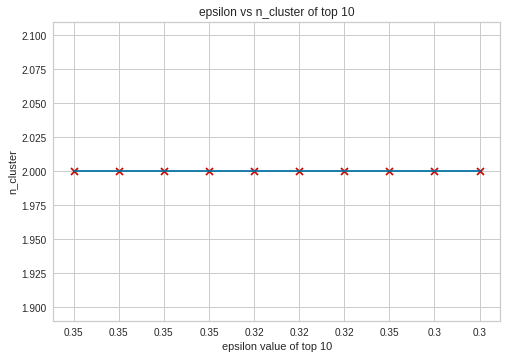

In [166]:
plt.plot(range(1,11),top_10['cluster'],'bx-')
plt.scatter(range(1,11),top_10['cluster'],marker='x',c='r')
plt.xticks(range(1,11),top_10['eps'])

plt.xlabel('epsilon value of top 10')
plt.ylabel('n_cluster')
plt.title('epsilon vs n_cluster of top 10')
plt.show()

Text(0.5, 1.0, 'min_sample vs n_cluster of top 10')

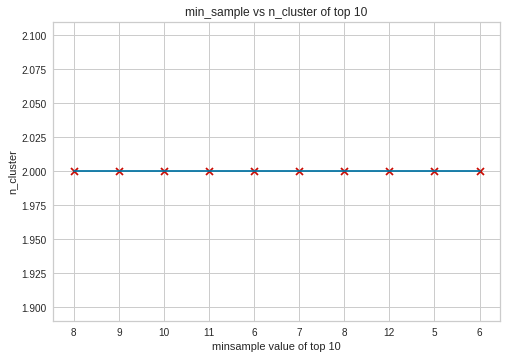

In [167]:
plt.plot(range(1,11),top_10['cluster'],'bx-')
plt.scatter(range(1,11),top_10['cluster'],marker='x',c='r')
plt.xticks(range(1,11),top_10['minsample'])
plt.xlabel('minsample value of top 10')
plt.ylabel('n_cluster')
plt.title('min_sample vs n_cluster of top 10')

Text(0.5, 1.0, 'epsilon vs n_cluster')

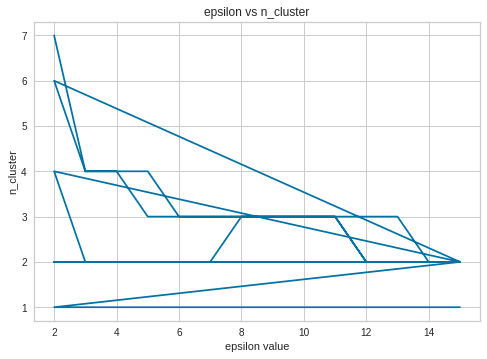

In [168]:
x = []
y = []
for i in eps:
  x.append(i[0])
  y.append(i[1])
plt.plot(x,y)
plt.xlabel('epsilon value')
plt.ylabel('n_cluster')
plt.title('epsilon vs n_cluster')

Text(0.5, 1.0, 'minsamples vs n_cluster')

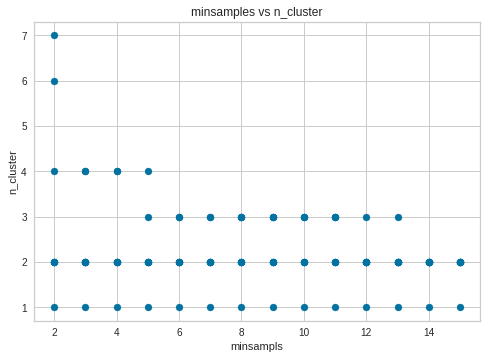

In [169]:
x = []
y = []
for i in out:
  x.append(i[0])
  y.append(i[1])
plt.scatter(x,y)

plt.xlabel('minsampls')
plt.ylabel('n_cluster')
plt.title('minsamples vs n_cluster')

In [170]:
# the best epsilon and min samples is 0.5 as epsilon and samples[2:15] this values achieve the high siluoette score on the best feature

In [171]:
scores_d=[]
n_cluster = []
out = []
ep = []
for i in [0.3,0.4,0.5,0.6,0.7]:
  for j in range(2,16):
    clustering = DBSCAN(eps=i, min_samples=j).fit(x_train)
    if len(np.unique(clustering.labels_))>1:
      scores_d.append(silhouette_score(X,clustering.labels_))
      print('epsilon= ',i,'minpoint= ',j,'silhouette = ',silhouette_score(X,clustering.labels_),'number of cluster = ',len(np.unique(clustering.labels_)))
    n_cluster.append(len(np.unique(clustering.labels_)))
    print('epsilon= ',i,'minpoint= ',j,'number of cluster = ',len(np.unique(clustering.labels_)))
    out.append((j,len(np.unique(clustering.labels_))))
    ep.append((i,len(np.unique(clustering.labels_))))

epsilon=  0.3 minpoint=  2 silhouette =  -0.01622477077736234 number of cluster =  7
epsilon=  0.3 minpoint=  2 number of cluster =  7
epsilon=  0.3 minpoint=  3 silhouette =  0.18252375717749458 number of cluster =  4
epsilon=  0.3 minpoint=  3 number of cluster =  4
epsilon=  0.3 minpoint=  4 silhouette =  0.25461011232889785 number of cluster =  4
epsilon=  0.3 minpoint=  4 number of cluster =  4
epsilon=  0.3 minpoint=  5 silhouette =  0.2680427930082315 number of cluster =  3
epsilon=  0.3 minpoint=  5 number of cluster =  3
epsilon=  0.3 minpoint=  6 silhouette =  0.26553783556103266 number of cluster =  3
epsilon=  0.3 minpoint=  6 number of cluster =  3
epsilon=  0.3 minpoint=  7 silhouette =  0.2592862903200582 number of cluster =  3
epsilon=  0.3 minpoint=  7 number of cluster =  3
epsilon=  0.3 minpoint=  8 silhouette =  0.25956950191144124 number of cluster =  3
epsilon=  0.3 minpoint=  8 number of cluster =  3
epsilon=  0.3 minpoint=  9 silhouette =  0.2440185514197394 num

In [172]:
# the best epsilon and min samples is 0.5 as epsilon and samples[2:15] this values achieve the high siluoette score on the best feature

Text(0.5, 1.0, 'epsilon vs n_cluster')

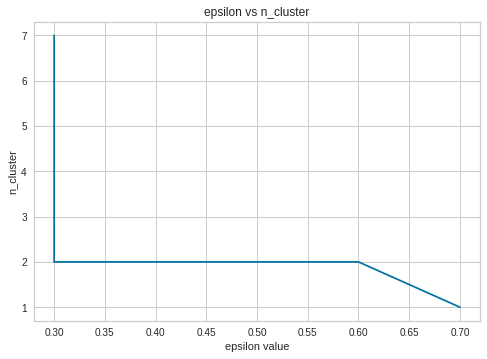

In [173]:
x = []
y = []
for i in ep:
  x.append(i[0])
  y.append(i[1])
plt.plot(x,y)
plt.xlabel('epsilon value')
plt.ylabel('n_cluster')
plt.title('epsilon vs n_cluster')

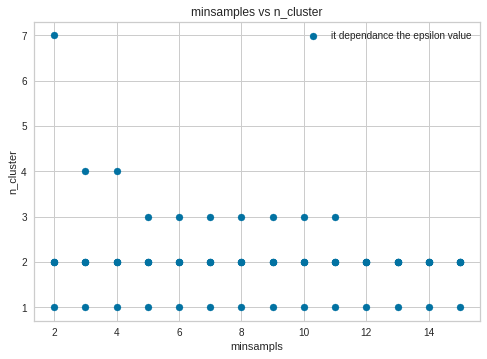

In [174]:
x = []
y = []
for i in out:
  x.append(i[0])
  y.append(i[1])
plt.scatter(x,y)

plt.xlabel('minsampls')
plt.ylabel('n_cluster')
plt.title('minsamples vs n_cluster')
plt.legend(labels=['it dependance the epsilon value'])